### ✨ TESTING ✨

In [ ]:
#!/usr/bin/env python3
import unicodedata

def normalize_bangla(text: str) -> str:
    if text is None:
        return ""
    text = str(text)
    text = unicodedata.normalize("NFC", text)
    text = text.replace("\u200c", "")  # ZWNJ
    text = text.replace("\u200d", "")  # ZWJ
    text = " ".join(text.split())
    return text

# Input sentences (with problems)
inputs = [
    "বড়লোকটি  ছেলেটিকে \u200cঅর্ধচন্দ্র  দিয়ে   বের করে  দিলেন",
    "মালিকের\u200c সামনে   বেশি\u200dবলায়\u200c   তাকে  অর্ধচন্দ্র \u200dপেতে\u00a0হলো",
    "অফিসে   দেরি  করায়\n   ম্যানেজার\u200c তাকে  অর্ধচন্দ্র \u200dদিলেন",
    "কৃষক\tঅর্ধচন্দ্র   দিয়ে \u200cঘাস \u200dকাটছে",
    "আমি  বাগানে \u200c\u200dঅর্ধচন্দ্র    দেখেছি"
]

print("INPUT:")
print("-" * 80)
for i, sentence in enumerate(inputs, 1):
    print(f"{i}. {sentence}")

print("OUTPUT:")
print("-" * 80)
for i, sentence in enumerate(inputs, 1):
    print(f"{i}. {normalize_bangla(sentence)}")

INPUT:
--------------------------------------------------------------------------------
1. বড়লোকটি  ছেলেটিকে ‌অর্ধচন্দ্র  দিয়ে   বের করে  দিলেন
2. মালিকের‌ সামনে   বেশি‍বলায়‌   তাকে  অর্ধচন্দ্র ‍পেতে হলো
3. অফিসে   দেরি  করায়
   ম্যানেজার‌ তাকে  অর্ধচন্দ্র ‍দিলেন
4. কৃষক	অর্ধচন্দ্র   দিয়ে ‌ঘাস ‍কাটছে
5. আমি  বাগানে ‌‍অর্ধচন্দ্র    দেখেছি
OUTPUT:
--------------------------------------------------------------------------------
1. বড়লোকটি ছেলেটিকে অর্ধচন্দ্র দিয়ে বের করে দিলেন
2. মালিকের সামনে বেশিবলায় তাকে অর্ধচন্দ্র পেতে হলো
3. অফিসে দেরি করায় ম্যানেজার তাকে অর্ধচন্দ্র দিলেন
4. কৃষক অর্ধচন্দ্র দিয়ে ঘাস কাটছে
5. আমি বাগানে অর্ধচন্দ্র দেখেছি


In [ ]:
#!/usr/bin/env python3
# =========================================
# FEATURE EXTRACTION OUTPUT VIEWER
# =========================================
import os
import numpy as np
import pickle
from scipy.sparse import load_npz

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

SPLIT_DIR    = os.path.join(PROJECT_ROOT, "02_splits")
LABELS_DIR   = os.path.join(PROJECT_ROOT, "03_labels")
FEAT_ML_THREE = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")
TEXT_RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")

print("=" * 80)
print("📊 FEATURE EXTRACTION OUTPUT SUMMARY")
print("=" * 80)

# ==========================================
# 1. SPLIT INFORMATION
# ==========================================
print("\n" + "=" * 80)
print("1️⃣  DATASET SPLITS")
print("=" * 80)

train_idx = np.load(os.path.join(SPLIT_DIR, "train_idx.npy"))
val_idx   = np.load(os.path.join(SPLIT_DIR, "val_idx.npy"))
test_idx  = np.load(os.path.join(SPLIT_DIR, "test_idx.npy"))

print(f"\n📁 Split Directory: {SPLIT_DIR}")
print(f"\n   Train samples: {len(train_idx):,}")
print(f"   Val samples:   {len(val_idx):,}")
print(f"   Test samples:  {len(test_idx):,}")
print(f"   Total:         {len(train_idx) + len(val_idx) + len(test_idx):,}")

ratio_train = len(train_idx) / (len(train_idx) + len(val_idx) + len(test_idx)) * 100
ratio_val   = len(val_idx) / (len(train_idx) + len(val_idx) + len(test_idx)) * 100
ratio_test  = len(test_idx) / (len(train_idx) + len(val_idx) + len(test_idx)) * 100

print(f"\n   Split Ratio: {ratio_train:.1f}% / {ratio_val:.1f}% / {ratio_test:.1f}%")

# ==========================================
# 2. LABELS DISTRIBUTION
# ==========================================
print("\n" + "=" * 80)
print("2️⃣  LABELS DISTRIBUTION")
print("=" * 80)

y_train = np.load(os.path.join(LABELS_DIR, "y_train.npy"))
y_val   = np.load(os.path.join(LABELS_DIR, "y_val.npy"))
y_test  = np.load(os.path.join(LABELS_DIR, "y_test.npy"))

print(f"\n📁 Labels Directory: {LABELS_DIR}")

def show_label_dist(y, name):
    counts = np.bincount(y)
    print(f"\n   {name}:")
    for i, count in enumerate(counts):
        pct = count / len(y) * 100
        print(f"      Class {i}: {count:,} ({pct:.1f}%)")

show_label_dist(y_train, "Train")
show_label_dist(y_val,   "Validation")
show_label_dist(y_test,  "Test")

# ==========================================
# 3. RAW TEXT FIELDS (for DL/Transformers)
# ==========================================
print("\n" + "=" * 80)
print("3️⃣  RAW TEXT FIELDS (DL/Transformers)")
print("=" * 80)

print(f"\n📁 Raw Text Directory: {TEXT_RAW_DIR}")
print("\n   Available splits:")

for split_name in ["train", "val", "test"]:
    split_path = os.path.join(TEXT_RAW_DIR, split_name)
    if os.path.exists(split_path):
        print(f"\n   • {split_name.upper()}:")
        for field in ["sentence", "idiom_word", "idiom_meaning"]:
            field_path = os.path.join(split_path, f"{field}.npy")
            if os.path.exists(field_path):
                data = np.load(field_path, allow_pickle=True)
                print(f"      - {field}.npy: {len(data):,} samples")
                # Show a sample
                if len(data) > 0:
                    sample = str(data[0])
                    if len(sample) > 60:
                        sample = sample[:60] + "..."
                    print(f"        Sample: {sample}")

# ==========================================
# 4. ML FEATURES (TF-IDF)
# ==========================================
print("\n" + "=" * 80)
print("4️⃣  ML FEATURES (TF-IDF - Three Fields)")
print("=" * 80)

print(f"\n📁 ML Features Directory: {FEAT_ML_THREE}")

X_train = load_npz(os.path.join(FEAT_ML_THREE, "X_train.npz"))
X_val   = load_npz(os.path.join(FEAT_ML_THREE, "X_val.npz"))
X_test  = load_npz(os.path.join(FEAT_ML_THREE, "X_test.npz"))

print(f"\n   Feature Matrix Shapes:")
print(f"      Train: {X_train.shape} ({X_train.nnz:,} non-zero values)")
print(f"      Val:   {X_val.shape} ({X_val.nnz:,} non-zero values)")
print(f"      Test:  {X_test.shape} ({X_test.nnz:,} non-zero values)")

print(f"\n   Sparsity:")
print(f"      Train: {(1 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.2f}%")
print(f"      Val:   {(1 - X_val.nnz / (X_val.shape[0] * X_val.shape[1])) * 100:.2f}%")
print(f"      Test:  {(1 - X_test.nnz / (X_test.shape[0] * X_test.shape[1])) * 100:.2f}%")

# Load vectorizers
with open(os.path.join(FEAT_ML_THREE, "sentence_vectorizer.pkl"), "rb") as f:
    vec_sent = pickle.load(f)
with open(os.path.join(FEAT_ML_THREE, "meaning_vectorizer.pkl"), "rb") as f:
    vec_mean = pickle.load(f)
with open(os.path.join(FEAT_ML_THREE, "idiom_vectorizer.pkl"), "rb") as f:
    vec_idm = pickle.load(f)

print(f"\n   Vectorizer Configurations:")
print(f"\n      Sentence Vectorizer:")
print(f"         - Analyzer: {vec_sent.analyzer}")
print(f"         - N-gram range: {vec_sent.ngram_range}")
print(f"         - Max features: {vec_sent.max_features}")
print(f"         - Vocabulary size: {len(vec_sent.vocabulary_):,}")

print(f"\n      Idiom Meaning Vectorizer:")
print(f"         - Analyzer: {vec_mean.analyzer}")
print(f"         - N-gram range: {vec_mean.ngram_range}")
print(f"         - Max features: {vec_mean.max_features}")
print(f"         - Vocabulary size: {len(vec_mean.vocabulary_):,}")

print(f"\n      Idiom Word Vectorizer:")
print(f"         - Analyzer: {vec_idm.analyzer}")
print(f"         - N-gram range: {vec_idm.ngram_range}")
print(f"         - Max features: {vec_idm.max_features}")
print(f"         - Vocabulary size: {len(vec_idm.vocabulary_):,}")

# ==========================================
# 5. FEATURE BREAKDOWN
# ==========================================
print("\n" + "=" * 80)
print("5️⃣  FEATURE DIMENSION BREAKDOWN")
print("=" * 80)

sent_features = len(vec_sent.vocabulary_)
mean_features = len(vec_mean.vocabulary_)
idm_features  = len(vec_idm.vocabulary_)
total_features = sent_features + mean_features + idm_features

print(f"\n   Sentence features:      {sent_features:,} ({sent_features/total_features*100:.1f}%)")
print(f"   Idiom meaning features: {mean_features:,} ({mean_features/total_features*100:.1f}%)")
print(f"   Idiom word features:    {idm_features:,} ({idm_features/total_features*100:.1f}%)")
print(f"   " + "-" * 60)
print(f"   Total features:         {total_features:,}")

# ==========================================
# 6. SAMPLE FEATURES (Top TF-IDF terms)
# ==========================================
print("\n" + "=" * 80)
print("6️⃣  TOP TF-IDF FEATURES (Sample)")
print("=" * 80)

def show_top_features(vectorizer, name, n=10):
    feature_names = vectorizer.get_feature_names_out()
    print(f"\n   {name} - Top {n} features:")
    for i, feat in enumerate(feature_names[:n], 1):
        print(f"      {i:2d}. {feat}")

show_top_features(vec_sent, "Sentence", 10)
show_top_features(vec_mean, "Idiom Meaning", 10)
show_top_features(vec_idm, "Idiom Word", 10)

# ==========================================
# 7. STORAGE SIZE
# ==========================================
print("\n" + "=" * 80)
print("7️⃣  STORAGE SIZE")
print("=" * 80)

def get_dir_size(path):
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if os.path.exists(fp):
                total += os.path.getsize(fp)
    return total

def format_size(bytes):
    for unit in ['B', 'KB', 'MB', 'GB']:
        if bytes < 1024.0:
            return f"{bytes:.2f} {unit}"
        bytes /= 1024.0
    return f"{bytes:.2f} TB"

print(f"\n   Splits:      {format_size(get_dir_size(SPLIT_DIR))}")
print(f"   Labels:      {format_size(get_dir_size(LABELS_DIR))}")
print(f"   Raw Text:    {format_size(get_dir_size(TEXT_RAW_DIR))}")
print(f"   ML Features: {format_size(get_dir_size(FEAT_ML_THREE))}")

# ==========================================
# SUMMARY
# ==========================================
print("\n" + "=" * 80)
print("✅ SUMMARY")
print("=" * 80)

print(f"""
   Dataset Split:    {len(train_idx):,} / {len(val_idx):,} / {len(test_idx):,} (Train/Val/Test)
   Total Features:   {total_features:,} (TF-IDF)
   Feature Format:   Sparse CSR matrices
   Label Classes:    {len(np.unique(y_train))}

   ✅ All feature extraction outputs are ready for model training!
""")

print("=" * 80)

📊 FEATURE EXTRACTION OUTPUT SUMMARY

1️⃣  DATASET SPLITS

📁 Split Directory: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/02_splits

   Train samples: 10,969
   Val samples:   2,350
   Test samples:  2,351
   Total:         15,670

   Split Ratio: 70.0% / 15.0% / 15.0%

2️⃣  LABELS DISTRIBUTION

📁 Labels Directory: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/03_labels

   Train:
      Class 0: 5,484 (50.0%)
      Class 1: 5,485 (50.0%)

   Validation:
      Class 0: 1,175 (50.0%)
      Class 1: 1,175 (50.0%)

   Test:
      Class 0: 1,175 (50.0%)
      Class 1: 1,176 (50.0%)

3️⃣  RAW TEXT FIELDS (DL/Transformers)

📁 Raw Text Directory: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/04_features/text_raw

   Available splits:

   • TRAIN:
      - sentence.npy: 10,969 samples
        Sample: এত দিনের পুরোনো কারবার এবার পাথালিকোলা করার সময় এসেছে
      - idiom_word.npy: 10,969 samples
        Sample: পাথালিকোলা
      - idiom_meaning.npy: 10,969 samples
        Sample: আড়তোলা

   • VAL:

### ✨MOUNT DRIVE✨

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# =========================================
# 0) PROJECT SETUP (Google Colab + Drive)
# =========================================

import os
BASE_DIR = "/content/drive/MyDrive/THESIS"

PROJECT_ROOT = os.path.join(BASE_DIR, "THESIS_PIPELINE")

DIRS = [
    "01_clean",
    "02_splits",
    "03_labels",
    "04_features/ml/single",
    "04_features/dl/single",
    "06_results/ml/single",
    "06_results/dl/single",
    "06_results/transformers/single",
]

for d in DIRS:
    os.makedirs(os.path.join(PROJECT_ROOT, d), exist_ok=True)

print("✅ Project root:", PROJECT_ROOT)
print("✅ Folder structure ready.")

✅ Project root: /content/drive/MyDrive/THESIS/THESIS_PIPELINE
✅ Folder structure ready.


### ✨DATASET ANALYSIS✨

LOADING DATASET
✅ Loaded 15670 instances
✅ Columns: ['idiom_word', 'idiom_meaning', 'sentence', 'i_label', 's_label', 'reason']

BASIC DATASET STATISTICS
Total Instances: 15,670
Unique Idioms Covered: 1,316
Average Sentences per Idiom: 11.91

Usage Correctness Label Distribution (s_label):
  0 (Incorrect): 7,834 instances (49.99%)
  1 (Correct): 7,836 instances (50.01%)

Idiom Distribution:
  Min sentences per idiom: 10
  Max sentences per idiom: 30
  Mean sentences per idiom: 11.91
  Median sentences per idiom: 10.0

SENTENCE FIELD: TEXT ANALYSIS

📊 WORD-LEVEL STATISTICS:
  Mean length: 10.27 words
  Median length: 10.0 words
  Std deviation: 3.20 words
  Min length: 0 words
  Max length: 34 words
  25th percentile: 8.0 words
  75th percentile: 12.0 words
  90th percentile: 14.0 words
  95th percentile: 16.0 words

📊 CHARACTER-LEVEL STATISTICS:
  Mean length: 58.47 characters
  Median length: 56.0 characters
  Std deviation: 18.03 characters
  Min length: 0 characters
  Max length: 19

/tmp/ipython-input-2705068868.py:371: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(bands_names, rotation=45, ha='right', fontsize=9)
/tmp/ipython-input-2705068868.py:468: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_DIR, "sentence_text_analysis.png"), dpi=300, bbox_inches='tight')
/tmp/ipython-input-2705068868.py:468: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(os.path.join(OUTPUT_DIR, "sentence_text_analysis.png"), dpi=300, bbox_inches='tight')
/tmp/ipython-input-2705068868.py:468: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_DIR, "sentence_text_analysis.png"), dpi=300, bbox_inches='tight')
/tmp/ipython-input-2705068868.py:468: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) Deja

✅ Saved visualization to: /content/drive/MyDrive/THESIS/DATASET_ANALYSIS/sentence_text_analysis.png
✅ Saved report to: /content/drive/MyDrive/THESIS/DATASET_ANALYSIS/sentence_analysis_report.csv
✅ Saved top words to: /content/drive/MyDrive/THESIS/DATASET_ANALYSIS/top_50_words.csv

✅ ANALYSIS COMPLETE

All outputs saved to: /content/drive/MyDrive/THESIS/DATASET_ANALYSIS/

Files created:
  1. sentence_field_statistics.json - Complete statistics in JSON
  2. sentence_text_analysis.png - Comprehensive visualizations
  3. sentence_analysis_report.csv - Summary table
  4. top_50_words.csv - Top 50 frequent words with stats


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dis

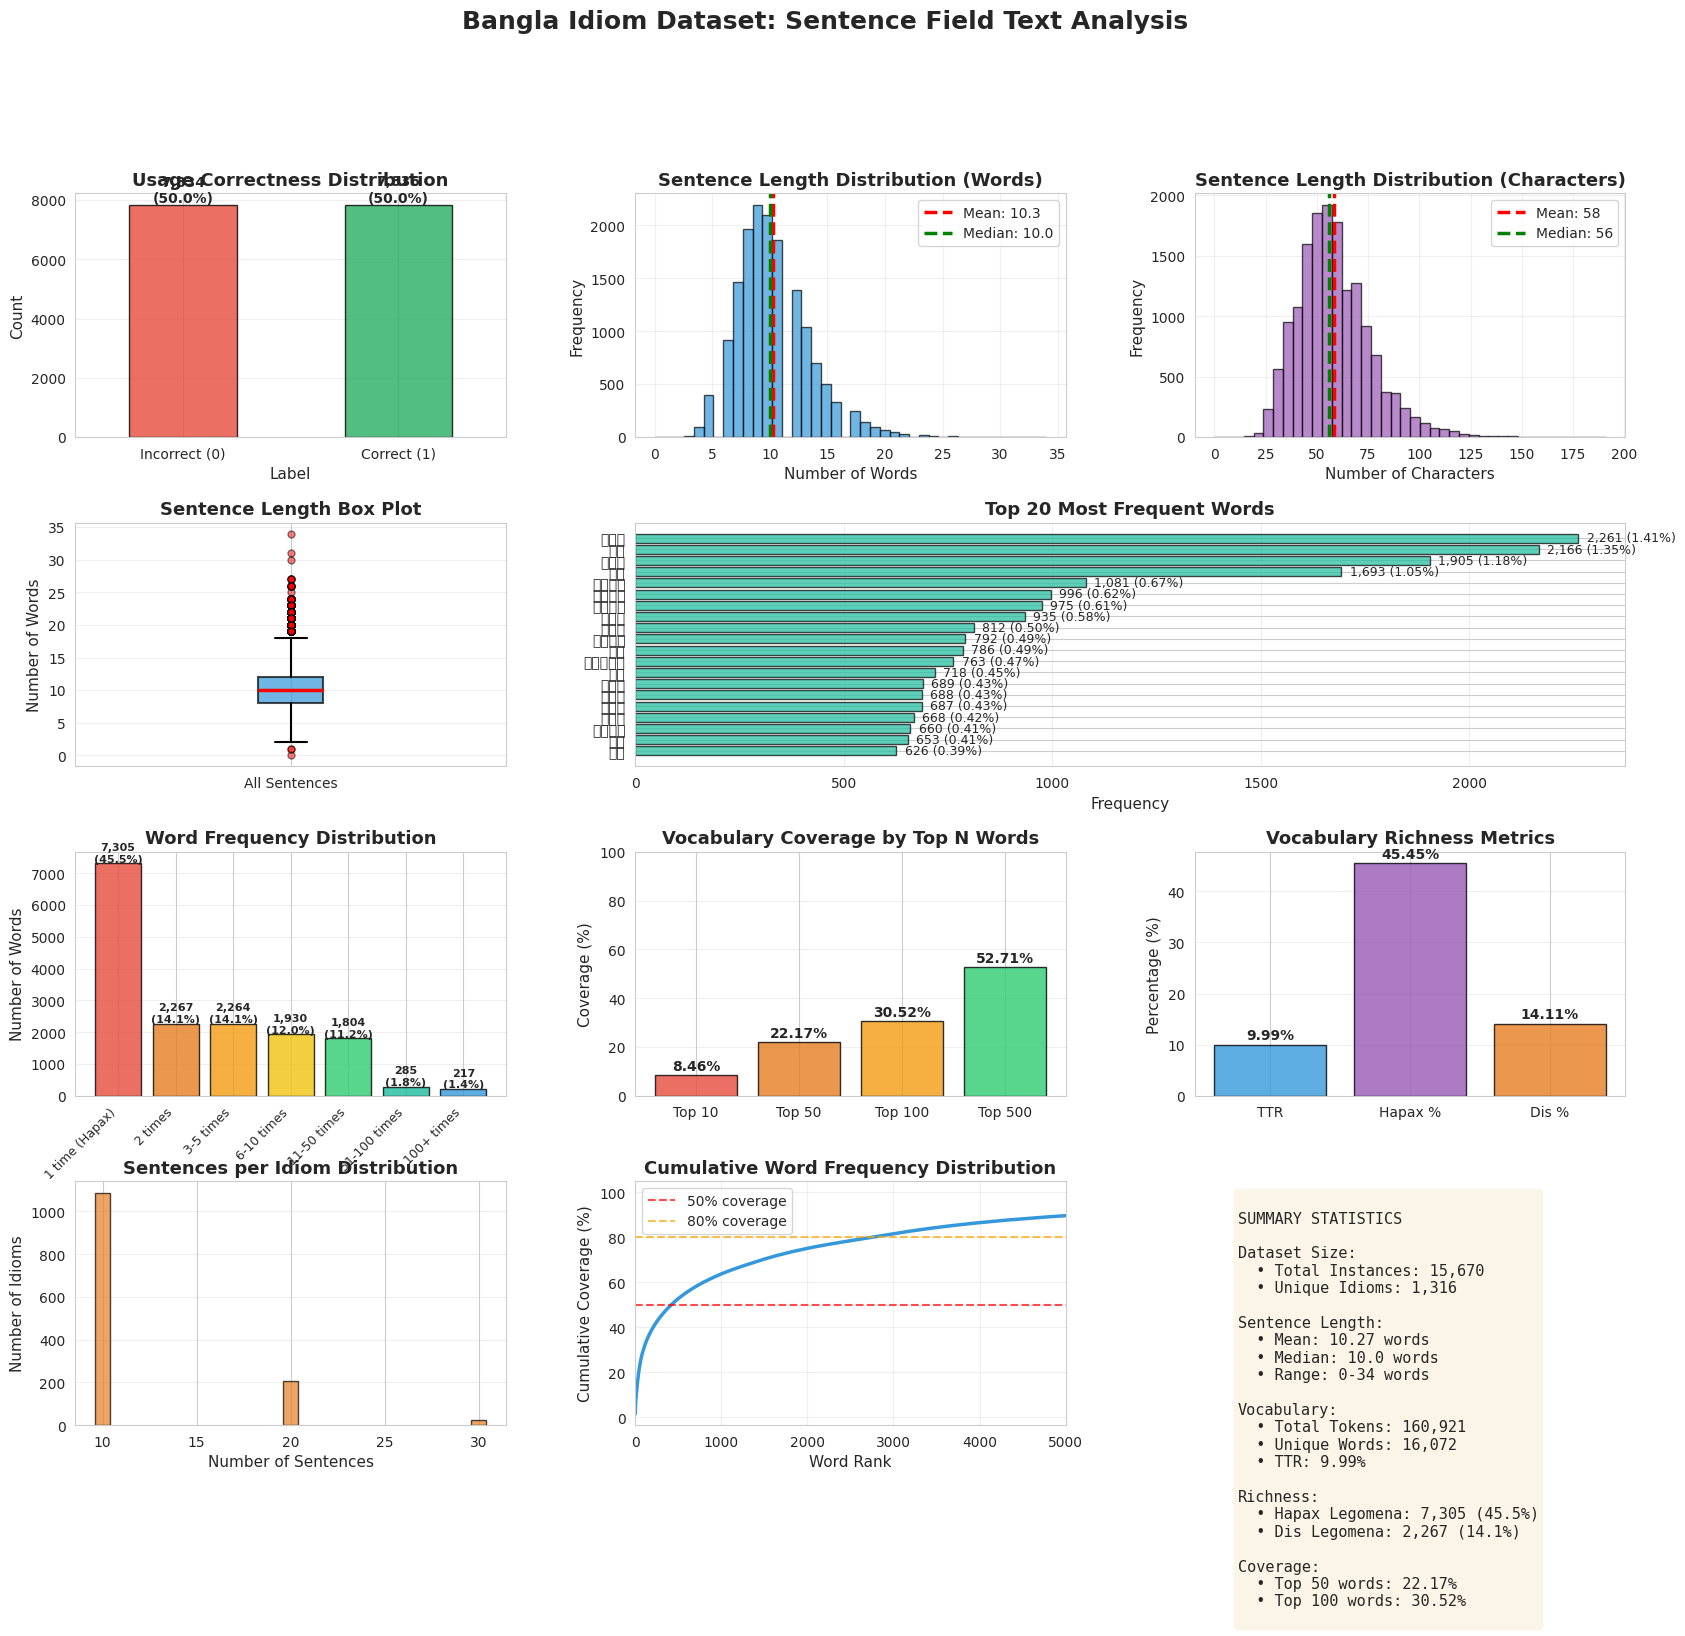

In [ ]:
# =========================================
# DATASET STATISTICS & TEXT ANALYSIS
# Focus: SENTENCE FIELD ONLY
# =========================================

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.gridspec import GridSpec

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 12)

# =========================================
# PATHS
# =========================================
INPUT_JSONL = "/content/drive/MyDrive/THESIS/DATASETS/INPUT_DATASET.jsonl"
OUTPUT_DIR = "/content/drive/MyDrive/THESIS/DATASET_ANALYSIS"

import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================================
# LOAD DATA
# =========================================
print("="*60)
print("LOADING DATASET")
print("="*60)

data = []
with open(INPUT_JSONL, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
print(f"✅ Loaded {len(df)} instances")
print(f"✅ Columns: {list(df.columns)}")

# =========================================
# BASIC DATASET STATISTICS
# =========================================
print("\n" + "="*60)
print("BASIC DATASET STATISTICS")
print("="*60)

total_instances = len(df)
unique_idioms = df['idiom_word'].nunique()
avg_sentences_per_idiom = total_instances / unique_idioms

print(f"Total Instances: {total_instances:,}")
print(f"Unique Idioms Covered: {unique_idioms:,}")
print(f"Average Sentences per Idiom: {avg_sentences_per_idiom:.2f}")

# Label distribution
if 's_label' in df.columns:
    s_label_dist = df['s_label'].value_counts().sort_index()
    print(f"\nUsage Correctness Label Distribution (s_label):")
    for label, count in s_label_dist.items():
        pct = (count / total_instances) * 100
        label_name = "Correct" if label == 1 else "Incorrect"
        print(f"  {label} ({label_name}): {count:,} instances ({pct:.2f}%)")

# Idiom frequency
idiom_counts = df['idiom_word'].value_counts()
print(f"\nIdiom Distribution:")
print(f"  Min sentences per idiom: {idiom_counts.min()}")
print(f"  Max sentences per idiom: {idiom_counts.max()}")
print(f"  Mean sentences per idiom: {idiom_counts.mean():.2f}")
print(f"  Median sentences per idiom: {idiom_counts.median():.1f}")

# =========================================
# SENTENCE TEXT ANALYSIS
# =========================================
print("\n" + "="*60)
print("SENTENCE FIELD: TEXT ANALYSIS")
print("="*60)

# Word-level statistics
df['sentence_word_count'] = df['sentence'].apply(lambda x: len(str(x).split()))

print(f"\n📊 WORD-LEVEL STATISTICS:")
print(f"  Mean length: {df['sentence_word_count'].mean():.2f} words")
print(f"  Median length: {df['sentence_word_count'].median():.1f} words")
print(f"  Std deviation: {df['sentence_word_count'].std():.2f} words")
print(f"  Min length: {df['sentence_word_count'].min()} words")
print(f"  Max length: {df['sentence_word_count'].max()} words")
print(f"  25th percentile: {df['sentence_word_count'].quantile(0.25):.1f} words")
print(f"  75th percentile: {df['sentence_word_count'].quantile(0.75):.1f} words")
print(f"  90th percentile: {df['sentence_word_count'].quantile(0.90):.1f} words")
print(f"  95th percentile: {df['sentence_word_count'].quantile(0.95):.1f} words")

# Character-level statistics
df['sentence_char_count'] = df['sentence'].str.len()

print(f"\n📊 CHARACTER-LEVEL STATISTICS:")
print(f"  Mean length: {df['sentence_char_count'].mean():.2f} characters")
print(f"  Median length: {df['sentence_char_count'].median():.1f} characters")
print(f"  Std deviation: {df['sentence_char_count'].std():.2f} characters")
print(f"  Min length: {df['sentence_char_count'].min()} characters")
print(f"  Max length: {df['sentence_char_count'].max()} characters")

# =========================================
# VOCABULARY RICHNESS ANALYSIS
# =========================================
print("\n" + "="*60)
print("SENTENCE FIELD: VOCABULARY RICHNESS")
print("="*60)

# Extract all words from sentences
all_words = []
for sentence in df['sentence']:
    words = str(sentence).split()
    all_words.extend(words)

# Unique vocabulary
unique_vocab = set(all_words)
total_tokens = len(all_words)

print(f"\n📚 VOCABULARY SIZE:")
print(f"  Total tokens (words): {total_tokens:,}")
print(f"  Unique words (types): {len(unique_vocab):,}")

# Type-Token Ratio (TTR) - Lexical Diversity
ttr = (len(unique_vocab) / total_tokens) * 100

print(f"\n📈 LEXICAL DIVERSITY:")
print(f"  Type-Token Ratio (TTR): {ttr:.2f}%")
print(f"  Interpretation:")
if ttr > 40:
    print(f"    → High diversity (TTR > 40%) - Rich vocabulary variation")
elif ttr > 30:
    print(f"    → Moderate diversity (30-40%) - Typical for focused domain text")
else:
    print(f"    → Lower diversity (TTR < 30%) - Some repetitive patterns")

# Word frequency distribution
word_freq = Counter(all_words)

# Hapax Legomena (words appearing only once)
hapax_words = [word for word, count in word_freq.items() if count == 1]
hapax_count = len(hapax_words)
hapax_pct = (hapax_count / len(unique_vocab)) * 100

print(f"\n📖 HAPAX LEGOMENA (words appearing only once):")
print(f"  Count: {hapax_count:,} words")
print(f"  Percentage of vocabulary: {hapax_pct:.2f}%")
print(f"  Interpretation:")
print(f"    → High hapax (>50%): Very diverse, many rare words")
print(f"    → Moderate hapax (30-50%): Balanced vocabulary")
print(f"    → Low hapax (<30%): More repetitive core vocabulary")

# Dis Legomena (words appearing exactly twice)
dis_words = [word for word, count in word_freq.items() if count == 2]
dis_count = len(dis_words)
dis_pct = (dis_count / len(unique_vocab)) * 100

print(f"\n📖 DIS LEGOMENA (words appearing exactly twice):")
print(f"  Count: {dis_count:,} words")
print(f"  Percentage of vocabulary: {dis_pct:.2f}%")

# Frequency bands
freq_bands = {
    "1 time (Hapax)": sum(1 for c in word_freq.values() if c == 1),
    "2 times": sum(1 for c in word_freq.values() if c == 2),
    "3-5 times": sum(1 for c in word_freq.values() if 3 <= c <= 5),
    "6-10 times": sum(1 for c in word_freq.values() if 6 <= c <= 10),
    "11-50 times": sum(1 for c in word_freq.values() if 11 <= c <= 50),
    "51-100 times": sum(1 for c in word_freq.values() if 51 <= c <= 100),
    "100+ times": sum(1 for c in word_freq.values() if c > 100)
}

print(f"\n📊 WORD FREQUENCY DISTRIBUTION:")
for band, count in freq_bands.items():
    pct = (count / len(unique_vocab)) * 100
    print(f"  {band}: {count:,} words ({pct:.2f}%)")

# =========================================
# TOP FREQUENT WORDS
# =========================================
print("\n" + "="*60)
print("SENTENCE FIELD: MOST FREQUENT WORDS")
print("="*60)

top_50 = word_freq.most_common(50)

print(f"\n🔝 TOP 50 MOST FREQUENT WORDS:")
for rank, (word, count) in enumerate(top_50, 1):
    pct = (count / total_tokens) * 100
    print(f"  {rank:2d}. '{word}' → {count:,} occurrences ({pct:.3f}%)")

# Coverage analysis
top_10_coverage = sum(count for _, count in word_freq.most_common(10)) / total_tokens * 100
top_50_coverage = sum(count for _, count in word_freq.most_common(50)) / total_tokens * 100
top_100_coverage = sum(count for _, count in word_freq.most_common(100)) / total_tokens * 100
top_500_coverage = sum(count for _, count in word_freq.most_common(500)) / total_tokens * 100

print(f"\n📊 VOCABULARY COVERAGE:")
print(f"  Top 10 words cover: {top_10_coverage:.2f}% of all tokens")
print(f"  Top 50 words cover: {top_50_coverage:.2f}% of all tokens")
print(f"  Top 100 words cover: {top_100_coverage:.2f}% of all tokens")
print(f"  Top 500 words cover: {top_500_coverage:.2f}% of all tokens")

# =========================================
# SAVE STATISTICS TO JSON
# =========================================
print("\n" + "="*60)
print("SAVING STATISTICS")
print("="*60)

stats_summary = {
    "dataset_overview": {
        "total_instances": int(total_instances),
        "unique_idioms": int(unique_idioms),
        "avg_sentences_per_idiom": float(avg_sentences_per_idiom)
    },
    "label_distribution": {
        "s_label": {
            int(k): {
                "count": int(v),
                "percentage": float(v / total_instances * 100)
            } for k, v in s_label_dist.items()
        }
    },
    "sentence_text_statistics": {
        "word_level": {
            "mean": float(df['sentence_word_count'].mean()),
            "median": float(df['sentence_word_count'].median()),
            "std": float(df['sentence_word_count'].std()),
            "min": int(df['sentence_word_count'].min()),
            "max": int(df['sentence_word_count'].max()),
            "p25": float(df['sentence_word_count'].quantile(0.25)),
            "p50": float(df['sentence_word_count'].quantile(0.50)),
            "p75": float(df['sentence_word_count'].quantile(0.75)),
            "p90": float(df['sentence_word_count'].quantile(0.90)),
            "p95": float(df['sentence_word_count'].quantile(0.95))
        },
        "character_level": {
            "mean": float(df['sentence_char_count'].mean()),
            "median": float(df['sentence_char_count'].median()),
            "std": float(df['sentence_char_count'].std()),
            "min": int(df['sentence_char_count'].min()),
            "max": int(df['sentence_char_count'].max())
        }
    },
    "vocabulary_richness": {
        "total_tokens": total_tokens,
        "unique_words": len(unique_vocab),
        "type_token_ratio_percentage": float(ttr),
        "hapax_legomena": {
            "count": hapax_count,
            "percentage": float(hapax_pct)
        },
        "dis_legomena": {
            "count": dis_count,
            "percentage": float(dis_pct)
        },
        "frequency_distribution": freq_bands,
        "vocabulary_coverage": {
            "top_10_words": float(top_10_coverage),
            "top_50_words": float(top_50_coverage),
            "top_100_words": float(top_100_coverage),
            "top_500_words": float(top_500_coverage)
        }
    },
    "top_50_words": [
        {
            "rank": i,
            "word": word,
            "count": count,
            "percentage": float(count / total_tokens * 100)
        } for i, (word, count) in enumerate(top_50, 1)
    ]
}

with open(os.path.join(OUTPUT_DIR, "sentence_field_statistics.json"), "w", encoding="utf-8") as f:
    json.dump(stats_summary, f, indent=2, ensure_ascii=False)

print(f"✅ Saved statistics to: {OUTPUT_DIR}/sentence_field_statistics.json")

# =========================================
# VISUALIZATION
# =========================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.35, wspace=0.30)

# 1. Label Distribution
ax1 = fig.add_subplot(gs[0, 0])
colors_labels = ['#e74c3c', '#27ae60']
s_label_dist.plot(kind='bar', ax=ax1, color=colors_labels, edgecolor='black', alpha=0.8)
ax1.set_title('Usage Correctness Distribution', fontsize=13, fontweight='bold')
ax1.set_xlabel('Label', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_xticklabels(['Incorrect (0)', 'Correct (1)'], rotation=0, fontsize=10)
for i, v in enumerate(s_label_dist):
    pct = v / total_instances * 100
    ax1.text(i, v + 100, f'{v:,}\n({pct:.1f}%)', ha='center', fontsize=10, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

# 2. Sentence Length (Words) - Histogram
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df['sentence_word_count'], bins=40, color='#3498db', edgecolor='black', alpha=0.7)
ax2.axvline(df['sentence_word_count'].mean(), color='red', linestyle='--', linewidth=2.5,
            label=f'Mean: {df["sentence_word_count"].mean():.1f}')
ax2.axvline(df['sentence_word_count'].median(), color='green', linestyle='--', linewidth=2.5,
            label=f'Median: {df["sentence_word_count"].median():.1f}')
ax2.set_title('Sentence Length Distribution (Words)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Number of Words', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# 3. Sentence Length (Characters) - Histogram
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(df['sentence_char_count'], bins=40, color='#9b59b6', edgecolor='black', alpha=0.7)
ax3.axvline(df['sentence_char_count'].mean(), color='red', linestyle='--', linewidth=2.5,
            label=f'Mean: {df["sentence_char_count"].mean():.0f}')
ax3.axvline(df['sentence_char_count'].median(), color='green', linestyle='--', linewidth=2.5,
            label=f'Median: {df["sentence_char_count"].median():.0f}')
ax3.set_title('Sentence Length Distribution (Characters)', fontsize=13, fontweight='bold')
ax3.set_xlabel('Number of Characters', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# 4. Box Plot - Sentence Length
ax4 = fig.add_subplot(gs[1, 0])
bp = ax4.boxplot(df['sentence_word_count'], vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5),
                 medianprops=dict(color='red', linewidth=2.5),
                 whiskerprops=dict(color='black', linewidth=1.5),
                 capprops=dict(color='black', linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
ax4.set_title('Sentence Length Box Plot', fontsize=13, fontweight='bold')
ax4.set_ylabel('Number of Words', fontsize=11)
ax4.set_xticklabels(['All Sentences'], fontsize=10)
ax4.grid(alpha=0.3, axis='y')

# 5. Top 20 Words - Horizontal Bar
ax5 = fig.add_subplot(gs[1, 1:])
top_20 = word_freq.most_common(20)
words_20, counts_20 = zip(*top_20)
y_pos = np.arange(len(words_20))
ax5.barh(y_pos, counts_20, color='#1abc9c', edgecolor='black', alpha=0.7)
ax5.set_yticks(y_pos)
ax5.set_yticklabels(words_20, fontsize=10)
ax5.invert_yaxis()
ax5.set_title('Top 20 Most Frequent Words', fontsize=13, fontweight='bold')
ax5.set_xlabel('Frequency', fontsize=11)
for i, (word, count) in enumerate(top_20):
    pct = count / total_tokens * 100
    ax5.text(count + 20, i, f'{count:,} ({pct:.2f}%)', va='center', fontsize=9)
ax5.grid(alpha=0.3, axis='x')

# 6. Word Frequency Bands
ax6 = fig.add_subplot(gs[2, 0])
bands_names = list(freq_bands.keys())
bands_values = list(freq_bands.values())
colors_bands = ['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#2ecc71', '#1abc9c', '#3498db']
ax6.bar(bands_names, bands_values, color=colors_bands, edgecolor='black', alpha=0.8)
ax6.set_title('Word Frequency Distribution', fontsize=13, fontweight='bold')
ax6.set_xlabel('Frequency Band', fontsize=11)
ax6.set_ylabel('Number of Words', fontsize=11)
ax6.set_xticklabels(bands_names, rotation=45, ha='right', fontsize=9)
for i, v in enumerate(bands_values):
    pct = v / len(unique_vocab) * 100
    ax6.text(i, v + 50, f'{v:,}\n({pct:.1f}%)', ha='center', fontsize=8, fontweight='bold')
ax6.grid(alpha=0.3, axis='y')

# 7. Vocabulary Coverage
ax7 = fig.add_subplot(gs[2, 1])
coverage_data = {
    'Top 10': top_10_coverage,
    'Top 50': top_50_coverage,
    'Top 100': top_100_coverage,
    'Top 500': top_500_coverage
}
colors_coverage = ['#e74c3c', '#e67e22', '#f39c12', '#2ecc71']
ax7.bar(coverage_data.keys(), coverage_data.values(), color=colors_coverage, edgecolor='black', alpha=0.8)
ax7.set_title('Vocabulary Coverage by Top N Words', fontsize=13, fontweight='bold')
ax7.set_ylabel('Coverage (%)', fontsize=11)
ax7.set_ylim(0, 100)
for i, (k, v) in enumerate(coverage_data.items()):
    ax7.text(i, v + 2, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')
ax7.grid(alpha=0.3, axis='y')

# 8. Richness Metrics - Bar Chart
ax8 = fig.add_subplot(gs[2, 2])
richness_data = {
    'TTR': ttr,
    'Hapax %': hapax_pct,
    'Dis %': dis_pct
}
colors_rich = ['#3498db', '#9b59b6', '#e67e22']
ax8.bar(richness_data.keys(), richness_data.values(), color=colors_rich, edgecolor='black', alpha=0.8)
ax8.set_title('Vocabulary Richness Metrics', fontsize=13, fontweight='bold')
ax8.set_ylabel('Percentage (%)', fontsize=11)
for i, (k, v) in enumerate(richness_data.items()):
    ax8.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')
ax8.grid(alpha=0.3, axis='y')

# 9. Idiom Frequency Distribution
ax9 = fig.add_subplot(gs[3, 0])
idiom_freq_bins = idiom_counts.value_counts().sort_index()
ax9.bar(idiom_freq_bins.index, idiom_freq_bins.values, color='#e67e22', edgecolor='black', alpha=0.7)
ax9.set_title('Sentences per Idiom Distribution', fontsize=13, fontweight='bold')
ax9.set_xlabel('Number of Sentences', fontsize=11)
ax9.set_ylabel('Number of Idioms', fontsize=11)
ax9.grid(alpha=0.3, axis='y')

# 10. Cumulative Word Frequency (Zipf-like)
ax10 = fig.add_subplot(gs[3, 1])
sorted_freqs = sorted(word_freq.values(), reverse=True)
cumsum_freqs = np.cumsum(sorted_freqs)
cumsum_pct = (cumsum_freqs / total_tokens) * 100
ax10.plot(range(1, len(cumsum_pct) + 1), cumsum_pct, color='#3498db', linewidth=2.5)
ax10.set_title('Cumulative Word Frequency Distribution', fontsize=13, fontweight='bold')
ax10.set_xlabel('Word Rank', fontsize=11)
ax10.set_ylabel('Cumulative Coverage (%)', fontsize=11)
ax10.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% coverage')
ax10.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% coverage')
ax10.legend(fontsize=10)
ax10.grid(alpha=0.3)
ax10.set_xlim(0, 5000)

# 11. Summary Stats Table
ax11 = fig.add_subplot(gs[3, 2])
ax11.axis('off')
summary_text = f"""
SUMMARY STATISTICS

Dataset Size:
  • Total Instances: {total_instances:,}
  • Unique Idioms: {unique_idioms:,}

Sentence Length:
  • Mean: {df['sentence_word_count'].mean():.2f} words
  • Median: {df['sentence_word_count'].median():.1f} words
  • Range: {df['sentence_word_count'].min()}-{df['sentence_word_count'].max()} words

Vocabulary:
  • Total Tokens: {total_tokens:,}
  • Unique Words: {len(unique_vocab):,}
  • TTR: {ttr:.2f}%

Richness:
  • Hapax Legomena: {hapax_count:,} ({hapax_pct:.1f}%)
  • Dis Legomena: {dis_count:,} ({dis_pct:.1f}%)

Coverage:
  • Top 50 words: {top_50_coverage:.2f}%
  • Top 100 words: {top_100_coverage:.2f}%
"""
ax11.text(0.1, 0.95, summary_text, transform=ax11.transAxes,
          fontsize=11, verticalalignment='top', family='monospace',
          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

fig.suptitle('Bangla Idiom Dataset: Sentence Field Text Analysis',
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig(os.path.join(OUTPUT_DIR, "sentence_text_analysis.png"), dpi=300, bbox_inches='tight')
print(f"✅ Saved visualization to: {OUTPUT_DIR}/sentence_text_analysis.png")

# =========================================
# SAVE CSV REPORT
# =========================================
report_data = {
    'Metric': [
        'Total Instances',
        'Unique Idioms',
        'Correct Usage Count',
        'Incorrect Usage Count',
        'Mean Sentence Length (words)',
        'Median Sentence Length (words)',
        'Std Dev Sentence Length',
        'Min Sentence Length',
        'Max Sentence Length',
        'Mean Character Count',
        'Total Tokens',
        'Unique Words (Vocabulary)',
        'Type-Token Ratio (TTR) %',
        'Hapax Legomena Count',
        'Hapax Percentage %',
        'Dis Legomena Count',
        'Dis Legomena Percentage %',
        'Top 10 Words Coverage %',
        'Top 50 Words Coverage %',
        'Top 100 Words Coverage %'
    ],
    'Value': [
        f'{total_instances:,}',
        f'{unique_idioms:,}',
        f"{s_label_dist.get(1, 0):,} ({s_label_dist.get(1, 0)/total_instances*100:.2f}%)",
        f"{s_label_dist.get(0, 0):,} ({s_label_dist.get(0, 0)/total_instances*100:.2f}%)",
        f'{df["sentence_word_count"].mean():.2f}',
        f'{df["sentence_word_count"].median():.1f}',
        f'{df["sentence_word_count"].std():.2f}',
        f'{df["sentence_word_count"].min()}',
        f'{df["sentence_word_count"].max()}',
        f'{df["sentence_char_count"].mean():.2f}',
        f'{total_tokens:,}',
        f'{len(unique_vocab):,}',
        f'{ttr:.2f}%',
        f'{hapax_count:,}',
        f'{hapax_pct:.2f}%',
        f'{dis_count:,}',
        f'{dis_pct:.2f}%',
        f'{top_10_coverage:.2f}%',
        f'{top_50_coverage:.2f}%',
        f'{top_100_coverage:.2f}%'
    ]
}

report_df = pd.DataFrame(report_data)
report_df.to_csv(os.path.join(OUTPUT_DIR, "sentence_analysis_report.csv"),
                 index=False, encoding='utf-8-sig')
print(f"✅ Saved report to: {OUTPUT_DIR}/sentence_analysis_report.csv")

# Save top 50 words separately
top_50_df = pd.DataFrame([
    {
        'Rank': i,
        'Word': word,
        'Count': count,
        'Percentage': f'{count/total_tokens*100:.3f}%'
    } for i, (word, count) in enumerate(top_50, 1)
])
top_50_df.to_csv(os.path.join(OUTPUT_DIR, "top_50_words.csv"),
                 index=False, encoding='utf-8-sig')
print(f"✅ Saved top words to: {OUTPUT_DIR}/top_50_words.csv")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETE")
print("="*60)
print(f"\nAll outputs saved to: {OUTPUT_DIR}/")
print("\nFiles created:")
print("  1. sentence_field_statistics.json - Complete statistics in JSON")
print("  2. sentence_text_analysis.png - Comprehensive visualizations")
print("  3. sentence_analysis_report.csv - Summary table")
print("  4. top_50_words.csv - Top 50 frequent words with stats")

### ✨PREPROCESSING✨

In [2]:
# =========================================
# 1) UNICODE NORMALIZATION (Bangla JSONL)
# =========================================
import os
import json
import unicodedata

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

# ✅ Set your input dataset path in Drive
# Example: "/content/drive/MyDrive/THESIS/INPUT/INPUT_DATASET.jsonl"
INPUT_JSONL = "/content/drive/MyDrive/THESIS/DATASETS/INPUT_DATASET.jsonl"

OUT_JSONL = os.path.join(PROJECT_ROOT, "01_clean", "normalized.jsonl")
os.makedirs(os.path.dirname(OUT_JSONL), exist_ok=True)

def normalize_bangla(text: str) -> str:
    if text is None:
        return ""
    text = str(text)

    # NFC normalization
    text = unicodedata.normalize("NFC", text)

    # Remove zero-width chars
    text = text.replace("\u200c", "")  # ZWNJ
    text = text.replace("\u200d", "")  # ZWJ

    # Normalize whitespace
    text = " ".join(text.split())
    return text

required_cols = ["sentence", "idiom_word", "idiom_meaning", "s_label"]

n_in = 0
n_out = 0
bad_lines = 0

with open(INPUT_JSONL, "r", encoding="utf-8") as fin, open(OUT_JSONL, "w", encoding="utf-8") as fout:
    for line in fin:
        n_in += 1
        line = line.strip()
        if not line:
            continue

        try:
            obj = json.loads(line)
        except Exception:
            bad_lines += 1
            continue

        # Ensure required fields exist
        for c in required_cols:
            if c not in obj:
                obj[c] = "" if c != "s_label" else 0

        obj["sentence"]      = normalize_bangla(obj["sentence"])
        obj["idiom_word"]    = normalize_bangla(obj["idiom_word"])
        obj["idiom_meaning"] = normalize_bangla(obj["idiom_meaning"])

        # Force label to int (safe)
        try:
            obj["s_label"] = int(obj["s_label"])
        except Exception:
            obj["s_label"] = 0

        fout.write(json.dumps(obj, ensure_ascii=False) + "\n")
        n_out += 1

print("✅ Normalization done")
print("📥 Lines read:", n_in)
print("📤 Lines written:", n_out)
print("⚠️ Bad JSON lines skipped:", bad_lines)
print("📁 Saved:", OUT_JSONL)

✅ Normalization done
📥 Lines read: 15670
📤 Lines written: 15670
⚠️ Bad JSON lines skipped: 0
📁 Saved: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/01_clean/normalized.jsonl


### ✨ML FEATURE EXTRACTION AND MODEL TRAINING✨

#### FEATURE EXTRACTION

In [3]:
# =========================================
# STEP 3 (FINAL): Shared split + labels + ML features
# + DL/Transformer raw text saving (no duplicate "X_train.npy" etc)
# + Cleanup of old saved DL arrays from previous version
# =========================================

import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, save_npz

# -----------------------
# PATHS
# -----------------------
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RAW_PATH = os.path.join(PROJECT_ROOT, "01_clean", "normalized.jsonl")

SPLIT_DIR  = os.path.join(PROJECT_ROOT, "02_splits")
LABELS_DIR = os.path.join(PROJECT_ROOT, "03_labels")

# ✅ Keep ONLY THREE-FIELDS features
FEAT_ML_THREE  = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")

# ✅ New: raw text bundles for DL/Transformers (single source of truth)
TEXT_RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")  # train/val/test inside this

# ✅ removed FEAT_ML_SINGLE
for d in [SPLIT_DIR, LABELS_DIR, FEAT_ML_THREE, TEXT_RAW_DIR]:
    os.makedirs(d, exist_ok=True)

# -----------------------
# LOAD DATA
# -----------------------
print("✅ Loading:", RAW_PATH)
df = pd.read_json(RAW_PATH, lines=True).reset_index(drop=True)

df["sentence"]      = df["sentence"].fillna("").astype(str)
df["idiom_word"]    = df["idiom_word"].fillna("").astype(str)
df["idiom_meaning"] = df["idiom_meaning"].fillna("").astype(str)
df["s_label"]       = df["s_label"].astype(int)

sentences      = df["sentence"].values
idiom_words    = df["idiom_word"].values
idiom_meanings = df["idiom_meaning"].values
labels         = df["s_label"].values

print(f"✅ Samples: {len(df)} | Label dist:", np.bincount(labels))

# -----------------------
# SHARED SPLIT (stratified)
# -----------------------
indices = np.arange(len(df))
train_idx, temp_idx = train_test_split(indices, test_size=0.30, stratify=labels, random_state=42)
val_idx, test_idx   = train_test_split(temp_idx, test_size=0.50, stratify=labels[temp_idx], random_state=42)

np.save(os.path.join(SPLIT_DIR, "train_idx.npy"), train_idx)
np.save(os.path.join(SPLIT_DIR, "val_idx.npy"),   val_idx)
np.save(os.path.join(SPLIT_DIR, "test_idx.npy"),  test_idx)

y_train, y_val, y_test = labels[train_idx], labels[val_idx], labels[test_idx]
np.save(os.path.join(LABELS_DIR, "y_train.npy"), y_train)
np.save(os.path.join(LABELS_DIR, "y_val.npy"),   y_val)
np.save(os.path.join(LABELS_DIR, "y_test.npy"),  y_test)

print("✅ Split sizes:", len(train_idx), len(val_idx), len(test_idx))

# -----------------------
# SAVE RAW TEXT FIELDS ONCE (for DL + Transformers)
# -----------------------
def save_raw_split(name, idx):
    out_dir = os.path.join(TEXT_RAW_DIR, name)
    os.makedirs(out_dir, exist_ok=True)
    np.save(os.path.join(out_dir, "sentence.npy"),      sentences[idx])
    np.save(os.path.join(out_dir, "idiom_word.npy"),    idiom_words[idx])
    np.save(os.path.join(out_dir, "idiom_meaning.npy"), idiom_meanings[idx])

save_raw_split("train", train_idx)
save_raw_split("val",   val_idx)
save_raw_split("test",  test_idx)

print("✅ Saved DL/Transformer raw fields to:", TEXT_RAW_DIR)

# -----------------------
# ML FEATURES: THREE (sentence + idiom_word + idiom_meaning)
# -----------------------
X_train_3 = np.column_stack([sentences[train_idx], idiom_words[train_idx], idiom_meanings[train_idx]])
X_val_3   = np.column_stack([sentences[val_idx],   idiom_words[val_idx],   idiom_meanings[val_idx]])
X_test_3  = np.column_stack([sentences[test_idx],  idiom_words[test_idx],  idiom_meanings[test_idx]])

vec_sent = TfidfVectorizer(analyzer="char_wb", ngram_range=(3, 6), max_features=5000)
vec_mean = TfidfVectorizer(analyzer="word",   ngram_range=(1, 2), max_features=500)
vec_idm  = TfidfVectorizer(analyzer="char_wb", ngram_range=(2, 4), max_features=300)

X_train_sent = vec_sent.fit_transform(X_train_3[:, 0]); X_val_sent = vec_sent.transform(X_val_3[:, 0]); X_test_sent = vec_sent.transform(X_test_3[:, 0])
X_train_mean = vec_mean.fit_transform(X_train_3[:, 2]); X_val_mean = vec_mean.transform(X_val_3[:, 2]); X_test_mean = vec_mean.transform(X_test_3[:, 2])
X_train_idm  = vec_idm.fit_transform(X_train_3[:, 1]);  X_val_idm  = vec_idm.transform(X_val_3[:, 1]);  X_test_idm  = vec_idm.transform(X_test_3[:, 1])

X_train_three_feat = hstack([X_train_sent, X_train_mean, X_train_idm])
X_val_three_feat   = hstack([X_val_sent,   X_val_mean,   X_val_idm])
X_test_three_feat  = hstack([X_test_sent,  X_test_mean,  X_test_idm])

save_npz(os.path.join(FEAT_ML_THREE, "X_train.npz"), X_train_three_feat)
save_npz(os.path.join(FEAT_ML_THREE, "X_val.npz"),   X_val_three_feat)
save_npz(os.path.join(FEAT_ML_THREE, "X_test.npz"),  X_test_three_feat)

with open(os.path.join(FEAT_ML_THREE, "sentence_vectorizer.pkl"), "wb") as f:
    pickle.dump(vec_sent, f, protocol=pickle.HIGHEST_PROTOCOL)
with open(os.path.join(FEAT_ML_THREE, "meaning_vectorizer.pkl"), "wb") as f:
    pickle.dump(vec_mean, f, protocol=pickle.HIGHEST_PROTOCOL)
with open(os.path.join(FEAT_ML_THREE, "idiom_vectorizer.pkl"), "wb") as f:
    pickle.dump(vec_idm,  f, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ ML THREE TF-IDF saved:", X_train_three_feat.shape)

print("\n✅ DONE: Now you can train ML/DL/Transformer models in THREE-FIELDS mode consistently.")
print("🔑 DL/Transformers will load raw fields from:", TEXT_RAW_DIR)

✅ Loading: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/01_clean/normalized.jsonl
✅ Samples: 15670 | Label dist: [7834 7836]
✅ Split sizes: 10969 2350 2351
✅ Saved DL/Transformer raw fields to: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/04_features/text_raw
✅ ML THREE TF-IDF saved: (10969, 5800)

✅ DONE: Now you can train ML/DL/Transformer models in THREE-FIELDS mode consistently.
🔑 DL/Transformers will load raw fields from: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/04_features/text_raw


#### LR

In [ ]:
import os, json, pickle
import numpy as np
from scipy.sparse import load_npz
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")
FEAT_THREE = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "ml", "three", "LR")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "ml", "lr_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "ml", "lr_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy"))
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy"))
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy"))

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL
# =====================================================
def make_lr_elasticnet(C=1.0, l1_ratio=0.2):
    base_lr = LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        l1_ratio=l1_ratio,
        C=C,
        max_iter=5000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
    calibrated = CalibratedClassifierCV(base_lr, method="isotonic", cv="prefit")
    return base_lr, calibrated

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_lr_three(feat_dir, out_dir, C=1.0, l1_ratio=0.2):
    X_train = load_npz(os.path.join(feat_dir, "X_train.npz"))
    X_val   = load_npz(os.path.join(feat_dir, "X_val.npz"))
    X_test  = load_npz(os.path.join(feat_dir, "X_test.npz"))

    base_lr, calibrated = make_lr_elasticnet(C, l1_ratio)
    base_lr.fit(X_train, y_train)
    calibrated.fit(X_val, y_val)

    tr_prob = base_lr.predict_proba(X_train)[:, 1]
    va_prob = calibrated.predict_proba(X_val)[:, 1]
    te_prob = calibrated.predict_proba(X_test)[:, 1]

    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val, va_pred, va_prob)
    test_m  = compute_metrics(y_test, te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": base_lr.get_params()
    }

    with open(os.path.join(out_dir, "model.pkl"), "wb") as f:
        pickle.dump(base_lr, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== LR Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_lr_three(FEAT_THREE, OUT_THREE, C=0.8, l1_ratio=0.2)

summary = {
    "LR_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



===== LR Improved (THREE) =====
Best Threshold For Val: 0.49
Fit: GOOD FIT | F1 gap: 0.04
Test F1: 0.83 | Test ROC-AUC: 0.9
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1175
           1       0.78      0.88      0.83      1176

    accuracy                           0.82      2351
   macro avg       0.82      0.82      0.82      2351
weighted avg       0.82      0.82      0.82      2351

✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/lr_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/lr_three.png


#### SVM

In [ ]:
import os, json, pickle
import numpy as np
from scipy.sparse import load_npz
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")
FEAT_THREE = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "ml", "three", "SVM")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "ml", "svm_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "ml", "svm_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy"))
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy"))
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy"))

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL
# =====================================================
def make_svm_linear_calibrated(C=1.0, max_iter=7000, calibrate_cv=5):
    base = LinearSVC(
        C=C,
        class_weight="balanced",
        max_iter=max_iter,
        random_state=42
    )
    calibrated = CalibratedClassifierCV(base, cv=calibrate_cv)
    return calibrated

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_svm_three(feat_dir, out_dir, C=1.0, max_iter=7000, calibrate_cv=5):
    X_train = load_npz(os.path.join(feat_dir, "X_train.npz"))
    X_val   = load_npz(os.path.join(feat_dir, "X_val.npz"))
    X_test  = load_npz(os.path.join(feat_dir, "X_test.npz"))

    model = make_svm_linear_calibrated(C=C, max_iter=max_iter, calibrate_cv=calibrate_cv)
    model.fit(X_train, y_train)

    tr_prob = model.predict_proba(X_train)[:, 1]
    va_prob = model.predict_proba(X_val)[:, 1]
    te_prob = model.predict_proba(X_test)[:, 1]

    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val, va_pred, va_prob)
    test_m  = compute_metrics(y_test, te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "C": C,
            "max_iter": max_iter,
            "calibrate_cv": calibrate_cv,
            "class_weight": "balanced",
            "random_state": 42
        }
    }

    with open(os.path.join(out_dir, "model.pkl"), "wb") as f:
        pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== SVM Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_svm_three(FEAT_THREE, OUT_THREE, C=0.2, max_iter=7000, calibrate_cv=5)

summary = {
    "SVM_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)


===== SVM Improved (THREE) =====
Best Threshold For Val: 0.35
Fit: GOOD FIT | F1 gap: 0.05
Test F1: 0.84 | Test ROC-AUC: 0.91
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1175
           1       0.78      0.90      0.84      1176

    accuracy                           0.82      2351
   macro avg       0.83      0.82      0.82      2351
weighted avg       0.83      0.82      0.82      2351

✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/svm_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/svm_three.png


#### NB

In [ ]:
import os, json, pickle
import numpy as np
from scipy.sparse import load_npz
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")
FEAT_THREE = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "ml", "three", "NB")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "ml", "nb_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "ml", "nb_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy"))
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy"))
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy"))

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL
# =====================================================
def make_nb_calibrated(alpha=1.0):
    base = MultinomialNB(alpha=alpha)
    calibrated = CalibratedClassifierCV(base, method="isotonic", cv="prefit")
    return base, calibrated

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_nb_three(feat_dir, out_dir, alpha=1.0):
    X_train = load_npz(os.path.join(feat_dir, "X_train.npz"))
    X_val   = load_npz(os.path.join(feat_dir, "X_val.npz"))
    X_test  = load_npz(os.path.join(feat_dir, "X_test.npz"))

    base, calibrated = make_nb_calibrated(alpha=alpha)
    base.fit(X_train, y_train)
    calibrated.fit(X_val, y_val)

    tr_prob = base.predict_proba(X_train)[:, 1]
    va_prob = calibrated.predict_proba(X_val)[:, 1]
    te_prob = calibrated.predict_proba(X_test)[:, 1]

    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val, va_pred, va_prob)
    test_m  = compute_metrics(y_test, te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {"alpha": alpha}
    }

    with open(os.path.join(out_dir, "model.pkl"), "wb") as f:
        pickle.dump(base, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== NB Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_nb_three(FEAT_THREE, OUT_THREE, alpha=1.0)

summary = {
    "NB_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



===== NB Improved (THREE) =====
Best Threshold For Val: 0.43
Fit: GOOD FIT | F1 gap: 0.01
Test F1: 0.79 | Test ROC-AUC: 0.87
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1175
           1       0.76      0.83      0.79      1176

    accuracy                           0.78      2351
   macro avg       0.79      0.78      0.78      2351
weighted avg       0.79      0.78      0.78      2351

✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/nb_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/nb_three.png


#### ENSEMBLE

In [ ]:
import os, json, pickle
import numpy as np
from scipy.sparse import load_npz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")
FEAT_THREE = os.path.join(PROJECT_ROOT, "04_features", "ml", "three")

MODEL_DIR = os.path.join(PROJECT_ROOT, "06_results", "ml", "three")
OUT_ENSEMBLE = os.path.join(PROJECT_ROOT, "06_results", "ml", "three", "ENSEMBLE")
os.makedirs(OUT_ENSEMBLE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "ml", "ensemble_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "ml", "ensemble_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy"))
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy"))
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy"))

# =====================================================
# LOAD MODELS
# =====================================================
with open(os.path.join(MODEL_DIR, "LR", "model.pkl"), "rb") as f:
    lr_model = pickle.load(f)

with open(os.path.join(MODEL_DIR, "SVM", "model.pkl"), "rb") as f:
    svm_model = pickle.load(f)

with open(os.path.join(MODEL_DIR, "NB", "model.pkl"), "rb") as f:
    nb_model = pickle.load(f)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# ENSEMBLE: WEIGHTED VOTING
# =====================================================
def ensemble_weighted_voting(models, X, weights=None):
    """
    Weighted soft voting ensemble
    models: list of (model, name) tuples
    weights: list of weights (default: equal)
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)

    weights = np.array(weights)
    weights = weights / weights.sum()  # Normalize

    probas = []
    for model, _ in models:
        prob = model.predict_proba(X)[:, 1]
        probas.append(prob)

    # Weighted average
    ensemble_prob = np.average(probas, axis=0, weights=weights)
    return ensemble_prob

# =====================================================
# TRAIN + EVALUATE ENSEMBLE
# =====================================================
def run_ensemble_three(feat_dir, out_dir, weights=[0.40, 0.35, 0.25]):
    X_train = load_npz(os.path.join(feat_dir, "X_train.npz"))
    X_val   = load_npz(os.path.join(feat_dir, "X_val.npz"))
    X_test  = load_npz(os.path.join(feat_dir, "X_test.npz"))

    # Calibrate LR and NB on validation set
    from sklearn.calibration import CalibratedClassifierCV
    lr_calibrated = CalibratedClassifierCV(lr_model, method="isotonic", cv="prefit")
    lr_calibrated.fit(X_val, y_val)

    nb_calibrated = CalibratedClassifierCV(nb_model, method="isotonic", cv="prefit")
    nb_calibrated.fit(X_val, y_val)

    # Models list: (model, name)
    models = [
        (svm_model, "SVM"),
        (lr_calibrated, "LR"),
        (nb_calibrated, "NB")
    ]

    # Get ensemble probabilities
    tr_prob = ensemble_weighted_voting(models, X_train, weights)
    va_prob = ensemble_weighted_voting(models, X_val, weights)
    te_prob = ensemble_weighted_voting(models, X_test, weights)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    # Predictions
    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val, va_pred, va_prob)
    test_m  = compute_metrics(y_test, te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "ensemble_type": "weighted_voting",
            "weights": {"SVM": weights[0], "LR": weights[1], "NB": weights[2]},
            "models": ["SVM", "LR", "NB"]
        }
    }

    # Save ensemble config
    with open(os.path.join(out_dir, "ensemble_config.json"), "w") as f:
        json.dump(payload, f, indent=2)

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== ENSEMBLE (THREE) === corrored")
    print(f"Weights: SVM={weights[0]}, LR={weights[1]}, NB={weights[2]}")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_ensemble_three(FEAT_THREE, OUT_ENSEMBLE, weights=[0.40, 0.35, 0.25])

summary = {
    "ENSEMBLE_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"],
        "weights": payload["params"]["weights"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



===== ENSEMBLE (THREE) === corrored
Weights: SVM=0.4, LR=0.35, NB=0.25
Best Threshold For Val: 0.46
Fit: GOOD FIT | F1 gap: 0.04
Test F1: 0.83 | Test ROC-AUC: 0.9
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1175
           1       0.80      0.87      0.83      1176

    accuracy                           0.83      2351
   macro avg       0.83      0.83      0.82      2351
weighted avg       0.83      0.83      0.82      2351

✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/ensemble_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/ensemble_three.png


#### COMPARISON ML

In [ ]:
import os
import json
import pandas as pd

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RESULTS_DIR = os.path.join(PROJECT_ROOT, "06_results", "ml")

OUT_RANKING_CSV = os.path.join(RESULTS_DIR, "model_ranking_three.csv")
OUT_RANKING_JSON = os.path.join(RESULTS_DIR, "model_ranking_three.json")

# =====================================================
# MODEL NAME MAP (FOR SHORT PRINTING)
# =====================================================
MODEL_SHORT_NAME = {
    "Logistic Regression": "LR",
    "Support Vector Machine": "SVM",
    "Naive Bayes": "NB",
    "Ensemble (Weighted)": "EnsW"
}

# =====================================================
# LOAD METRICS
# =====================================================
def load_model_metrics(model_name, json_file):
    json_path = os.path.join(RESULTS_DIR, json_file)

    with open(json_path, "r") as f:
        data = json.load(f)

    model_key = list(data.keys())[0]
    metrics = data[model_key]

    folder_map = {
        "LOGISTIC_REGRESSION": "LR",
        "SUPPORT_VECTOR_MACHINE": "SVM",
        "NAIVE_BAYES": "NB",
        "ENSEMBLE_(WEIGHTED)": "ENSEMBLE"
    }

    model_folder = folder_map.get(model_name.replace(" ", "_").upper())

    detailed_path = os.path.join(
        PROJECT_ROOT, "06_results", "ml", "three", model_folder, "metrics.json"
    )

    try:
        with open(detailed_path, "r") as f:
            test_accuracy = json.load(f)["test"]["accuracy"]
    except:
        test_accuracy = None

    return {
        "Model": MODEL_SHORT_NAME[model_name],  # 👈 SHORT NAME USED
        "Test F1": metrics["test_f1"],
        "Test Accuracy": test_accuracy,
        "Val F1": metrics["val_f1"],
        "ROC-AUC": metrics["roc_auc"],
        "Avg Precision": metrics["avg_precision"],
        "Best Threshold": metrics["best_threshold"],
        "F1 Gap": metrics["f1_gap"],
        "Fit Status": metrics["fit_status"]
    }

# =====================================================
# COLLECT MODELS
# =====================================================
models_data = []

for name, file in [
    ("Logistic Regression", "lr_three.json"),
    ("Support Vector Machine", "svm_three.json"),
    ("Naive Bayes", "nb_three.json"),
    ("Ensemble (Weighted)", "ensemble_three.json")
]:
    try:
        models_data.append(load_model_metrics(name, file))
    except FileNotFoundError:
        pass

# =====================================================
# CREATE RANKING
# =====================================================
df = pd.DataFrame(models_data)

df = df.sort_values(
    by=["Test F1", "ROC-AUC"],
    ascending=False
).reset_index(drop=True)

df.insert(0, "Rank", range(1, len(df) + 1))

# =====================================================
# PRINT RANKING TABLE
# =====================================================
print("\nMODEL RANKING (THREE FEATURES)\n")
print(df.to_string(index=False))

# =====================================================
# SAVE FILES
# =====================================================
df.to_csv(OUT_RANKING_CSV, index=False)

ranking_json = {
    "feature_set": "THREE",
    "total_models": len(df),
    "best_model": df.iloc[0].to_dict(),
    "rankings": df.to_dict(orient="records")
}

with open(OUT_RANKING_JSON, "w") as f:
    json.dump(ranking_json, f, indent=2)

# =====================================================
# PRINT SAVED LOCATIONS
# =====================================================
print("\nFILES SAVED:")
print(f"CSV  → {OUT_RANKING_CSV}")
print(f"JSON → {OUT_RANKING_JSON}")


MODEL RANKING (THREE FEATURES)

 Rank Model  Test F1  Test Accuracy  Val F1  ROC-AUC  Avg Precision  Best Threshold  F1 Gap Fit Status
    1   SVM     0.84           0.82    0.85     0.91           0.91            0.35    0.05   GOOD FIT
    2    LR     0.83           0.82    0.84     0.90           0.88            0.49    0.04   GOOD FIT
    3  EnsW     0.83           0.83    0.84     0.90           0.90            0.46    0.04   GOOD FIT
    4    NB     0.79           0.78    0.81     0.87           0.84            0.43    0.01   GOOD FIT

FILES SAVED:
CSV  → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/model_ranking_three.csv
JSON → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/ml/model_ranking_three.json


### ✨DL FEATURE EXTRACTION AND MODEL TRAINING✨

#### BILSTM

In [4]:
import os, json
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# SEED
# =====================================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "BiLSTM")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "dl", "bilstm_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "dl", "bilstm_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

print(f"✅ Loaded splits | Train: {len(s_tr)} | Val: {len(s_va)} | Test: {len(s_te)}")

# =====================================================
# BUILD INPUTS (THREE FIELDS)
# =====================================================
def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

X_train_text = build_inputs_three(s_tr, w_tr, m_tr)
X_val_text   = build_inputs_three(s_va, w_va, m_va)
X_test_text  = build_inputs_three(s_te, w_te, m_te)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL ARCHITECTURE
# =====================================================
def make_bilstm(vocab_size, max_len, emb_dim=128, lstm_units=128, dropout=0.45, lr=2e-4):
    inp = layers.Input(shape=(max_len,), name="input_ids")
    x = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, name="embedding")(inp)
    x = layers.Bidirectional(layers.LSTM(lstm_units), name="bilstm")(x)
    x = layers.Dropout(dropout, name="dropout1")(x)
    x = layers.Dense(64, activation="relu", name="dense64")(x)
    x = layers.Dropout(dropout, name="dropout2")(x)
    out = layers.Dense(1, activation="sigmoid", name="out")(x)

    model = models.Model(inp, out, name="BiLSTM")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_bilstm_three(raw_dir, out_dir, MAX_WORDS=50000, MAX_LEN=180,
                     emb_dim=128, lstm_units=128, dropout=0.45, lr=2e-4,
                     batch_size=64, epochs=15):

    # Tokenization
    tok = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
    tok.fit_on_texts(X_train_text)

    def to_padded(tokenizer, texts, max_len):
        seq = tokenizer.texts_to_sequences(texts)
        return pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    X_train = to_padded(tok, X_train_text, MAX_LEN)
    X_val   = to_padded(tok, X_val_text,   MAX_LEN)
    X_test  = to_padded(tok, X_test_text,  MAX_LEN)

    vocab_used = min(MAX_WORDS, len(tok.word_index) + 1)
    print(f"✅ Tokenized | Vocab: {vocab_used} | Shape: {X_train.shape}")

    # Save tokenizer
    with open(os.path.join(out_dir, "tokenizer.json"), "w", encoding="utf-8") as f:
        f.write(tok.to_json())

    # Build model
    model = make_bilstm(
        vocab_size=MAX_WORDS,
        max_len=MAX_LEN,
        emb_dim=emb_dim,
        lstm_units=lstm_units,
        dropout=dropout,
        lr=lr
    )

    print("\n" + "="*60)
    print("MODEL ARCHITECTURE")
    print("="*60)
    model.summary()

    # Callbacks
    cb = [
        callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6, verbose=1)
    ]

    print("\n" + "="*60)
    print("TRAINING START")
    print("="*60)

    # Train
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=1
    )

    # Save model
    model.save(os.path.join(out_dir, "model.keras"))
    print("✅ Saved model")

    # Predictions
    tr_prob = model.predict(X_train, verbose=0).reshape(-1)
    va_prob = model.predict(X_val,   verbose=0).reshape(-1)
    te_prob = model.predict(X_test,  verbose=0).reshape(-1)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "MAX_WORDS": MAX_WORDS,
            "MAX_LEN": MAX_LEN,
            "emb_dim": emb_dim,
            "lstm_units": lstm_units,
            "dropout": dropout,
            "lr": lr,
            "batch_size": batch_size,
            "epochs_ran": len(hist.history["loss"]),
            "vocab_used": int(vocab_used)
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== BiLSTM Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_bilstm_three(
    RAW_DIR, OUT_THREE,
    MAX_WORDS=50000,
    MAX_LEN=180,
    emb_dim=128,
    lstm_units=128,
    dropout=0.45,
    lr=2e-4,
    batch_size=64,
    epochs=15
)

summary = {
    "BiLSTM_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded splits | Train: 10969 | Val: 2350 | Test: 2351
✅ Tokenized | Vocab: 13256 | Shape: (10969, 180)

MODEL ARCHITECTURE


Model: "BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 180, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bilstm (Bidirectional)          │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense64 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,679,681 (25.48 MB)

 Trainable params: 6,679,681 (25.48 MB)

 Non-trainable params: 0 (0.00 B)


TRAINING START
Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5427 - loss: 0.6822 - val_accuracy: 0.7604 - val_loss: 0.5018 - learning_rate: 2.0000e-04
Epoch 2/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8215 - loss: 0.4251 - val_accuracy: 0.8238 - val_loss: 0.4110 - learning_rate: 2.0000e-04
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8988 - loss: 0.2658 - val_accuracy: 0.8353 - val_loss: 0.4274 - learning_rate: 2.0000e-04
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9419 - loss: 0.1790
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9420 - loss: 0.1789 - val_accuracy: 0.8268 - val_loss: 0.4922 - learning_rate: 2.0000e-04
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9619 - loss: 0.1211 - val_accuracy: 0.8362 - val_loss: 0.5713 - learning_rate: 1.0000e-04
Epoch 5: early stopping
Restoring model weight

#### BIGRU

In [5]:
import os, json
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# SEED
# =====================================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "BiGRU")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "dl", "bigru_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "dl", "bigru_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

print(f"✅ Loaded splits | Train: {len(s_tr)} | Val: {len(s_va)} | Test: {len(s_te)}")

# =====================================================
# BUILD INPUTS (THREE FIELDS)
# =====================================================
def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

X_train_text = build_inputs_three(s_tr, w_tr, m_tr)
X_val_text   = build_inputs_three(s_va, w_va, m_va)
X_test_text  = build_inputs_three(s_te, w_te, m_te)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL ARCHITECTURE
# =====================================================
def make_bigru(vocab_size, max_len, emb_dim=128, gru_units=128, dropout=0.35, lr=2e-4):
    inp = layers.Input(shape=(max_len,), name="input_ids")
    x = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, name="embedding")(inp)
    x = layers.Bidirectional(layers.GRU(gru_units), name="bigru")(x)
    x = layers.Dropout(dropout, name="dropout1")(x)
    x = layers.Dense(64, activation="relu", name="dense64")(x)
    x = layers.Dropout(dropout, name="dropout2")(x)
    out = layers.Dense(1, activation="sigmoid", name="out")(x)

    model = models.Model(inp, out, name="BiGRU")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_bigru_three(raw_dir, out_dir, MAX_WORDS=50000, MAX_LEN=180,
                    emb_dim=128, gru_units=128, dropout=0.35, lr=2e-4,
                    batch_size=64, epochs=15):

    # Tokenization
    tok = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
    tok.fit_on_texts(X_train_text)

    def to_padded(tokenizer, texts, max_len):
        seq = tokenizer.texts_to_sequences(texts)
        return pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    X_train = to_padded(tok, X_train_text, MAX_LEN)
    X_val   = to_padded(tok, X_val_text,   MAX_LEN)
    X_test  = to_padded(tok, X_test_text,  MAX_LEN)

    vocab_used = min(MAX_WORDS, len(tok.word_index) + 1)
    print(f"✅ Tokenized | Vocab: {vocab_used} | Shape: {X_train.shape}")

    # Save tokenizer
    with open(os.path.join(out_dir, "tokenizer.json"), "w", encoding="utf-8") as f:
        f.write(tok.to_json())

    # Build model
    model = make_bigru(
        vocab_size=MAX_WORDS,
        max_len=MAX_LEN,
        emb_dim=emb_dim,
        gru_units=gru_units,
        dropout=dropout,
        lr=lr
    )

    print("\n" + "="*60)
    print("MODEL ARCHITECTURE")
    print("="*60)
    model.summary()

    # Callbacks
    cb = [
        callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6, verbose=1)
    ]

    print("\n" + "="*60)
    print("TRAINING START")
    print("="*60)

    # Train
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=1
    )

    # Save model
    model.save(os.path.join(out_dir, "model.keras"))
    print("✅ Saved model")

    # Predictions
    tr_prob = model.predict(X_train, verbose=0).reshape(-1)
    va_prob = model.predict(X_val,   verbose=0).reshape(-1)
    te_prob = model.predict(X_test,  verbose=0).reshape(-1)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "MAX_WORDS": MAX_WORDS,
            "MAX_LEN": MAX_LEN,
            "emb_dim": emb_dim,
            "gru_units": gru_units,
            "dropout": dropout,
            "lr": lr,
            "batch_size": batch_size,
            "epochs_ran": len(hist.history["loss"]),
            "vocab_used": int(vocab_used)
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== BiGRU Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_bigru_three(
    RAW_DIR, OUT_THREE,
    MAX_WORDS=50000,
    MAX_LEN=180,
    emb_dim=128,
    gru_units=128,
    dropout=0.35,
    lr=2e-4,
    batch_size=64,
    epochs=15
)

summary = {
    "BiGRU_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded splits | Train: 10969 | Val: 2350 | Test: 2351
✅ Tokenized | Vocab: 13256 | Shape: (10969, 180)

MODEL ARCHITECTURE


Model: "BiGRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 180, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bigru (Bidirectional)           │ (None, 256)            │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense64 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,614,657 (25.23 MB)

 Trainable params: 6,614,657 (25.23 MB)

 Non-trainable params: 0 (0.00 B)


TRAINING START
Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4976 - loss: 0.6935 - val_accuracy: 0.4966 - val_loss: 0.6932 - learning_rate: 2.0000e-04
Epoch 2/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.5060 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6934 - learning_rate: 2.0000e-04
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5036 - loss: 0.6929 - val_accuracy: 0.5791 - val_loss: 0.6768 - learning_rate: 2.0000e-04
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.7478 - loss: 0.5378 - val_accuracy: 0.7949 - val_loss: 0.4608 - learning_rate: 2.0000e-04
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8882 - loss: 0.2871 - val_accuracy: 0.8128 - val_loss: 0.4522 - learning_rate: 2.0000e-04
Epoch 6/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9305 - loss: 0.1977 - val_accuracy: 0.8251 - val_loss: 0.4672 - learning_rate: 2.0000e-04
Epoch 7/15
170/172 ━━━━━━━━━━━━━━━━━━━━

#### DNN

In [6]:
import os, json
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# SEED
# =====================================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "DNN")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "dl", "dnn_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "dl", "dnn_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

print(f"✅ Loaded splits | Train: {len(s_tr)} | Val: {len(s_va)} | Test: {len(s_te)}")

# =====================================================
# BUILD INPUTS (THREE FIELDS)
# =====================================================
def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

X_train_text = build_inputs_three(s_tr, w_tr, m_tr)
X_val_text   = build_inputs_three(s_va, w_va, m_va)
X_test_text  = build_inputs_three(s_te, w_te, m_te)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL ARCHITECTURE
# =====================================================
def make_dnn(vocab_size, max_len, emb_dim=128, hidden=(256, 128), dropout=0.40, lr=2e-4):
    inp = layers.Input(shape=(max_len,), name="input_ids")
    x = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, name="embedding")(inp)
    x = layers.GlobalAveragePooling1D(name="avg_pool")(x)
    x = layers.Dropout(dropout, name="dropout0")(x)

    for i, h in enumerate(hidden):
        x = layers.Dense(h, activation="relu", name=f"dense{i+1}")(x)
        x = layers.Dropout(dropout, name=f"dropout{i+1}")(x)

    out = layers.Dense(1, activation="sigmoid", name="out")(x)

    model = models.Model(inp, out, name="DNN")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_dnn_three(raw_dir, out_dir, MAX_WORDS=50000, MAX_LEN=180,
                  emb_dim=128, hidden=(256, 128), dropout=0.40, lr=2e-4,
                  batch_size=64, epochs=15):

    # Tokenization
    tok = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
    tok.fit_on_texts(X_train_text)

    def to_padded(tokenizer, texts, max_len):
        seq = tokenizer.texts_to_sequences(texts)
        return pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    X_train = to_padded(tok, X_train_text, MAX_LEN)
    X_val   = to_padded(tok, X_val_text,   MAX_LEN)
    X_test  = to_padded(tok, X_test_text,  MAX_LEN)

    vocab_used = min(MAX_WORDS, len(tok.word_index) + 1)
    print(f"✅ Tokenized | Vocab: {vocab_used} | Shape: {X_train.shape}")

    # Save tokenizer
    with open(os.path.join(out_dir, "tokenizer.json"), "w", encoding="utf-8") as f:
        f.write(tok.to_json())

    # Build model
    model = make_dnn(
        vocab_size=MAX_WORDS,
        max_len=MAX_LEN,
        emb_dim=emb_dim,
        hidden=hidden,
        dropout=dropout,
        lr=lr
    )

    print("\n" + "="*60)
    print("MODEL ARCHITECTURE")
    print("="*60)
    model.summary()

    # Callbacks
    cb = [
        callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6, verbose=1)
    ]

    print("\n" + "="*60)
    print("TRAINING START")
    print("="*60)

    # Train
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=1
    )

    # Save model
    model.save(os.path.join(out_dir, "model.keras"))
    print("✅ Saved model")

    # Predictions
    tr_prob = model.predict(X_train, verbose=0).reshape(-1)
    va_prob = model.predict(X_val,   verbose=0).reshape(-1)
    te_prob = model.predict(X_test,  verbose=0).reshape(-1)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "MAX_WORDS": MAX_WORDS,
            "MAX_LEN": MAX_LEN,
            "emb_dim": emb_dim,
            "hidden": list(hidden),
            "dropout": dropout,
            "lr": lr,
            "batch_size": batch_size,
            "epochs_ran": len(hist.history["loss"]),
            "vocab_used": int(vocab_used)
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== DNN Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_dnn_three(
    RAW_DIR, OUT_THREE,
    MAX_WORDS=50000,
    MAX_LEN=180,
    emb_dim=128,
    hidden=(256, 128),
    dropout=0.40,
    lr=2e-4,
    batch_size=64,
    epochs=15
)

summary = {
    "DNN_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded splits | Train: 10969 | Val: 2350 | Test: 2351
✅ Tokenized | Vocab: 13256 | Shape: (10969, 180)

MODEL ARCHITECTURE


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 180, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout0 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,466,049 (24.67 MB)

 Trainable params: 6,466,049 (24.67 MB)

 Non-trainable params: 0 (0.00 B)


TRAINING START
Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.4970 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6929 - learning_rate: 2.0000e-04
Epoch 2/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5074 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6927 - learning_rate: 2.0000e-04
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5147 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6927 - learning_rate: 2.0000e-04
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6923 - learning_rate: 2.0000e-04
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5165 - loss: 0.6920 - val_accuracy: 0.6996 - val_loss: 0.6916 - learning_rate: 2.0000e-04
Epoch 6/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5232 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6911 - learning_rate: 2.0000e-04
Epoch 7/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 

#### CNN

In [7]:
import os, json
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# SEED
# =====================================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "CNN")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "dl", "cnn_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "dl", "cnn_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

print(f"✅ Loaded splits | Train: {len(s_tr)} | Val: {len(s_va)} | Test: {len(s_te)}")

# =====================================================
# BUILD INPUTS (THREE FIELDS)
# =====================================================
def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

X_train_text = build_inputs_three(s_tr, w_tr, m_tr)
X_val_text   = build_inputs_three(s_va, w_va, m_va)
X_test_text  = build_inputs_three(s_te, w_te, m_te)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# MODEL ARCHITECTURE
# =====================================================
def make_cnn(vocab_size, max_len, emb_dim=128, filters=128, kernel=5, dropout=0.35, lr=2e-4):
    inp = layers.Input(shape=(max_len,), name="input_ids")
    x = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, name="embedding")(inp)
    x = layers.Conv1D(filters=filters, kernel_size=kernel, activation="relu", padding="same", name="conv1")(x)
    x = layers.GlobalMaxPooling1D(name="gmp")(x)
    x = layers.Dropout(dropout, name="dropout1")(x)
    x = layers.Dense(64, activation="relu", name="dense64")(x)
    x = layers.Dropout(dropout, name="dropout2")(x)
    out = layers.Dense(1, activation="sigmoid", name="out")(x)

    model = models.Model(inp, out, name="CNN")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_cnn_three(raw_dir, out_dir, MAX_WORDS=50000, MAX_LEN=180,
                  emb_dim=128, filters=128, kernel=5, dropout=0.35, lr=2e-4,
                  batch_size=64, epochs=15):

    # Tokenization
    tok = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
    tok.fit_on_texts(X_train_text)

    def to_padded(tokenizer, texts, max_len):
        seq = tokenizer.texts_to_sequences(texts)
        return pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    X_train = to_padded(tok, X_train_text, MAX_LEN)
    X_val   = to_padded(tok, X_val_text,   MAX_LEN)
    X_test  = to_padded(tok, X_test_text,  MAX_LEN)

    vocab_used = min(MAX_WORDS, len(tok.word_index) + 1)
    print(f"✅ Tokenized | Vocab: {vocab_used} | Shape: {X_train.shape}")

    # Save tokenizer
    with open(os.path.join(out_dir, "tokenizer.json"), "w", encoding="utf-8") as f:
        f.write(tok.to_json())

    # Build model
    model = make_cnn(
        vocab_size=MAX_WORDS,
        max_len=MAX_LEN,
        emb_dim=emb_dim,
        filters=filters,
        kernel=kernel,
        dropout=dropout,
        lr=lr
    )

    print("\n" + "="*60)
    print("MODEL ARCHITECTURE")
    print("="*60)
    model.summary()

    # Callbacks
    cb = [
        callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6, verbose=1)
    ]

    print("\n" + "="*60)
    print("TRAINING START")
    print("="*60)

    # Train
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=1
    )

    # Save model
    model.save(os.path.join(out_dir, "model.keras"))
    print("✅ Saved model")

    # Predictions
    tr_prob = model.predict(X_train, verbose=0).reshape(-1)
    va_prob = model.predict(X_val,   verbose=0).reshape(-1)
    te_prob = model.predict(X_test,  verbose=0).reshape(-1)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "MAX_WORDS": MAX_WORDS,
            "MAX_LEN": MAX_LEN,
            "emb_dim": emb_dim,
            "filters": filters,
            "kernel": kernel,
            "dropout": dropout,
            "lr": lr,
            "batch_size": batch_size,
            "epochs_ran": len(hist.history["loss"]),
            "vocab_used": int(vocab_used)
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== CNN Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_cnn_three(
    RAW_DIR, OUT_THREE,
    MAX_WORDS=50000,
    MAX_LEN=180,
    emb_dim=128,
    filters=128,
    kernel=5,
    dropout=0.35,
    lr=2e-4,
    batch_size=64,
    epochs=15
)

summary = {
    "CNN_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded splits | Train: 10969 | Val: 2350 | Test: 2351
✅ Tokenized | Vocab: 13256 | Shape: (10969, 180)

MODEL ARCHITECTURE


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 180, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 180, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gmp (GlobalMaxPooling1D)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense64 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,490,369 (24.76 MB)

 Trainable params: 6,490,369 (24.76 MB)

 Non-trainable params: 0 (0.00 B)


TRAINING START
Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.5301 - loss: 0.6914 - val_accuracy: 0.7264 - val_loss: 0.6691 - learning_rate: 2.0000e-04
Epoch 2/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7138 - loss: 0.6343 - val_accuracy: 0.7826 - val_loss: 0.4851 - learning_rate: 2.0000e-04
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8335 - loss: 0.4108 - val_accuracy: 0.8170 - val_loss: 0.4021 - learning_rate: 2.0000e-04
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9053 - loss: 0.2562 - val_accuracy: 0.8268 - val_loss: 0.4011 - learning_rate: 2.0000e-04
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9431 - loss: 0.1639 - val_accuracy: 0.8349 - val_loss: 0.4239 - learning_rate: 2.0000e-04
Epoch 6/15
170/172 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9695 - loss: 0.1060
Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/s

#### ENSEMBLE DL

In [8]:
import os, json
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# =====================================================
# SEED
# =====================================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

# Top 3 Model directories
MODEL_DIRS = {
    "BiGRU": os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "BiGRU"),
    "CNN": os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "CNN"),
    "BiLSTM": os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "BiLSTM")
}

OUT_ENSEMBLE = os.path.join(PROJECT_ROOT, "06_results", "dl", "three", "ENSEMBLE")
os.makedirs(OUT_ENSEMBLE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "dl", "ensemble_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "dl", "ensemble_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

print(f"✅ Loaded splits | Train: {len(s_tr)} | Val: {len(s_va)} | Test: {len(s_te)}")

# =====================================================
# BUILD INPUTS (THREE FIELDS)
# =====================================================
def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

X_train_text = build_inputs_three(s_tr, w_tr, m_tr)
X_val_text   = build_inputs_three(s_va, w_va, m_va)
X_test_text  = build_inputs_three(s_te, w_te, m_te)

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# LOAD MODEL & TOKENIZER
# =====================================================
def load_model_and_tokenizer(model_dir):
    """Load keras model and tokenizer from directory"""
    model_path = os.path.join(model_dir, "model.keras")
    tokenizer_path = os.path.join(model_dir, "tokenizer.json")

    model = load_model(model_path)

    with open(tokenizer_path, "r", encoding="utf-8") as f:
        tokenizer = tokenizer_from_json(f.read())

    return model, tokenizer

# =====================================================
# PREPARE DATA FOR MODEL
# =====================================================
def prepare_data(tokenizer, texts, max_len=180):
    """Tokenize and pad sequences"""
    seq = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

# =====================================================
# ENSEMBLE METHOD
# =====================================================
def soft_voting_ensemble(models_dict, tokenizers_dict, X_text, weights=None):
    all_probs = []
    model_names = []

    for name, model in models_dict.items():
        tokenizer = tokenizers_dict[name]
        X = prepare_data(tokenizer, X_text)
        probs = model.predict(X, verbose=0).reshape(-1)
        all_probs.append(probs)
        model_names.append(name)

    all_probs = np.array(all_probs)  # Shape: (n_models, n_samples)

    if weights is not None:
        # Weighted average
        weight_array = np.array([weights[name] for name in model_names])
        weight_array = weight_array / weight_array.sum()  # Normalize
        ensemble_probs = np.average(all_probs, axis=0, weights=weight_array)
        print(f"  ✅ Used weighted average: {dict(zip(model_names, weight_array))}")
    else:
        # Simple average (equal weights)
        ensemble_probs = np.mean(all_probs, axis=0)

    return ensemble_probs

# =====================================================
# RUN ENSEMBLE
# =====================================================
def run_ensemble_three(model_dirs, out_dir, weights=None):

    # Load all models and tokenizers
    models = {}
    tokenizers = {}

    for name, model_dir in model_dirs.items():
        model, tokenizer = load_model_and_tokenizer(model_dir)
        models[name] = model
        tokenizers[name] = tokenizer

    tr_prob = soft_voting_ensemble(models, tokenizers, X_train_text, weights=weights)

    va_prob = soft_voting_ensemble(models, tokenizers, X_val_text, weights=weights)

    te_prob = soft_voting_ensemble(models, tokenizers, X_test_text, weights=weights)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    tr_pred = (tr_prob >= 0.5).astype(int)
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "ensemble_config": {
            "method": "soft_voting",
            "models": list(model_dirs.keys()),
            "weights": weights if weights else "equal"
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n" + "="*60)
    print("===== ENSEMBLE (BiGRU + CNN + BiLSTM) =====")
    print("="*60)
    print(f"Method: SOFT VOTING")
    print(f"Models: {', '.join(model_dirs.keys())}")
    print(f"Weights: {weights if weights else 'Equal (1/3 each)'}")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN - OPTION 1: EQUAL WEIGHTS (RECOMMENDED FIRST)
# =====================================================
art, payload = run_ensemble_three(
    MODEL_DIRS,
    OUT_ENSEMBLE,
    weights=None
)

summary = {
    "ENSEMBLE_TOP3_EQUAL": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"],
        "models": payload["ensemble_config"]["models"],
        "weights": "equal"
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("\n✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded splits | Train: 10969 | Val: 2350 | Test: 2351

===== ENSEMBLE (BiGRU + CNN + BiLSTM) =====
Method: SOFT VOTING
Models: BiGRU, CNN, BiLSTM
Weights: Equal (1/3 each)
Best Threshold For Val: 0.39
Fit: OVERFITTING | F1 gap: 0.1
Test F1: 0.83 | Test ROC-AUC: 0.91

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1175
           1       0.77      0.89      0.83      1176

    accuracy                           0.81      2351
   macro avg       0.82      0.81      0.81      2351
weighted avg       0.82      0.81      0.81      2351


✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/dl/ensemble_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/dl/ensemble_three.png


#### COMPARISON DL

In [10]:
import os
import json
import pandas as pd

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RESULTS_DIR = os.path.join(PROJECT_ROOT, "06_results", "dl")

OUT_RANKING_CSV = os.path.join(RESULTS_DIR, "model_ranking_three.csv")
OUT_RANKING_JSON = os.path.join(RESULTS_DIR, "model_ranking_three.json")

# =====================================================
# SHORT MODEL NAME MAP
# =====================================================
MODEL_SHORT_NAME = {
    "Bidirectional LSTM": "BiLSTM",
    "Bidirectional GRU": "BiGRU",
    "Deep Neural Network": "DNN",
    "Convolutional Neural Network": "CNN",
    "Ensemble (Weighted)": "EnsW"
}

FOLDER_MAP = {
    "BiLSTM": "BiLSTM",
    "BiGRU": "BiGRU",
    "DNN": "DNN",
    "CNN": "CNN",
    "EnsW": "ENSEMBLE"
}

# =====================================================
# LOAD METRICS
# =====================================================
def load_model_metrics(model_name):
    short_name = MODEL_SHORT_NAME[model_name]
    model_folder = FOLDER_MAP[short_name]

    metrics_path = os.path.join(
        PROJECT_ROOT, "06_results", "dl", "three", model_folder, "metrics.json"
    )

    with open(metrics_path, "r") as f:
        m = json.load(f)

    return {
        "Model": short_name,
        "Test F1": m["test"]["f1"],
        "Test Accuracy": m["test"]["accuracy"],
        "Val F1": m["val"]["f1"],
        "ROC-AUC": m["test"]["roc_auc"],
        "Avg Precision": m["test"]["avg_precision"],
        "F1 Gap": m["f1_gap"],
        "Fit Status": m["fit_status"]
    }

# =====================================================
# COLLECT MODELS
# =====================================================
models_data = []

for model in MODEL_SHORT_NAME.keys():
    try:
        models_data.append(load_model_metrics(model))
    except FileNotFoundError:
        pass

# =====================================================
# CREATE RANKING
# =====================================================
df = pd.DataFrame(models_data)

df = df.sort_values(
    by=["Test F1", "ROC-AUC"],
    ascending=False
).reset_index(drop=True)

df.insert(0, "Rank", range(1, len(df) + 1))

df = df[
    ["Rank", "Model", "Test F1", "Test Accuracy", "Val F1",
     "ROC-AUC", "Avg Precision", "F1 Gap", "Fit Status"]
]

# =====================================================
# PRINT RANKING TABLE
# =====================================================
print("\nMODEL RANKING (DL – THREE FEATURES)\n")
print(df.to_string(index=False))

# =====================================================
# SAVE FILES
# =====================================================
df.to_csv(OUT_RANKING_CSV, index=False)

ranking_json = {
    "feature_set": "THREE",
    "total_models": len(df),
    "best_model": df.iloc[0].to_dict(),
    "rankings": df.to_dict(orient="records")
}

with open(OUT_RANKING_JSON, "w") as f:
    json.dump(ranking_json, f, indent=2)

# =====================================================
# PRINT SAVED LOCATIONS
# =====================================================
print("\nFILES SAVED:")
print(f"CSV  → {OUT_RANKING_CSV}")
print(f"JSON → {OUT_RANKING_JSON}")


MODEL RANKING (DL – THREE FEATURES)

 Rank  Model  Test F1  Test Accuracy  Val F1  ROC-AUC  Avg Precision  F1 Gap  Fit Status
    1    CNN     0.83           0.82    0.84     0.91           0.91    0.12 OVERFITTING
    2   EnsW     0.83           0.81    0.84     0.91           0.91    0.10 OVERFITTING
    3 BiLSTM     0.82           0.82    0.83     0.90           0.90    0.09 OVERFITTING
    4  BiGRU     0.82           0.81    0.83     0.90           0.90    0.10 OVERFITTING
    5    DNN     0.78           0.75    0.80     0.86           0.84    0.08 OVERFITTING

FILES SAVED:
CSV  → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/dl/model_ranking_three.csv
JSON → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/dl/model_ranking_three.json


### ✨TRANSFORMER MODEL TRANING✨

#### BANGLABERT

In [2]:
import os, json
import numpy as np
import pandas as pd
import torch

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# =====================================================
# SETTINGS
# =====================================================
SEED = 42
MODEL_NAME = "csebuetnlp/banglabert"

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

RAW_DIR = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "three", "BanglaBERT")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "banglabert_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "transformers", "banglabert_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

Xtr = build_inputs_three(s_tr, w_tr, m_tr)
Xva = build_inputs_three(s_va, w_va, m_va)
Xte = build_inputs_three(s_te, w_te, m_te)

print(f"✅ Loaded text | Train: {len(Xtr)} | Val: {len(Xva)} | Test: {len(Xte)}")

# =====================================================
# TORCH DATASET
# =====================================================
class TxtDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.labels = labels
        self.enc = tokenizer(list(texts), truncation=True, padding=False, max_length=max_len)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.enc.items()}
        item["labels"] = torch.tensor(int(self.labels[idx]))
        return item

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def metrics_from_logits(eval_pred):
    logits, labels = eval_pred
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)

    acc  = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec  = recall_score(labels, preds, zero_division=0)
    f1v  = f1_score(labels, preds, zero_division=0)

    try:
        roc = roc_auc_score(labels, probs)
        ap  = average_precision_score(labels, probs)
    except Exception:
        roc, ap = None, None

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1v,
        "roc_auc": roc,
        "avg_precision": ap
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# PREDICTION HELPER
# =====================================================
def get_predictions(trainer, dataset):
    pred_out = trainer.predict(dataset)
    logits = pred_out.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)
    return preds, probs

# =====================================================
# TRAIN + EVALUATE
# =====================================================
def run_banglabert_three(raw_dir, out_dir, model_name=MODEL_NAME,
                         max_len=192, epochs=3, batch_size=16, lr=2e-5):

    print("\n" + "="*60)
    print("LOADING TOKENIZER & MODEL")
    print("="*60)

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    train_ds = TxtDataset(Xtr, y_train, tokenizer, max_len)
    val_ds   = TxtDataset(Xva, y_val,   tokenizer, max_len)
    test_ds  = TxtDataset(Xte, y_test,  tokenizer, max_len)

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    args = TrainingArguments(
        output_dir=os.path.join(out_dir, "runs"),
        eval_strategy="epoch",
        logging_strategy="epoch",
        save_strategy="no",
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        learning_rate=lr,
        report_to="none",
        seed=SEED
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
        compute_metrics=metrics_from_logits
    )

    print("\n" + "="*60)
    print("TRAINING START")
    print("="*60)

    trainer.train()

    # Save model & tokenizer
    model.save_pretrained(os.path.join(out_dir, "model"))
    tokenizer.save_pretrained(os.path.join(out_dir, "tokenizer"))
    print("✅ Saved model & tokenizer")

    # Get predictions
    print("\n" + "="*60)
    print("GENERATING PREDICTIONS")
    print("="*60)

    tr_pred, tr_prob = get_predictions(trainer, train_ds)
    va_pred, va_prob = get_predictions(trainer, val_ds)
    te_pred, te_prob = get_predictions(trainer, test_ds)

    # Optimize threshold on validation set
    best_thr = optimize_threshold(y_val, va_prob)

    # Re-predict with optimized threshold
    va_pred = (va_prob >= best_thr["threshold"]).astype(int)
    te_pred = (te_prob >= best_thr["threshold"]).astype(int)

    # Metrics
    train_m = compute_metrics(y_train, tr_pred, tr_prob)
    val_m   = compute_metrics(y_val,   va_pred, va_prob)
    test_m  = compute_metrics(y_test,  te_pred, te_prob)

    status, gap = fit_status(train_m["f1"], val_m["f1"])

    # Save predictions as CSV
    for split_name, y_true, y_pred, y_prob in [
        ("train", y_train, tr_pred, tr_prob),
        ("val", y_val, va_pred, va_prob),
        ("test", y_test, te_pred, te_prob)
    ]:
        df = pd.DataFrame({
            "split": split_name,
            "y_true": y_true,
            "y_pred": y_pred,
            "prob_1": y_prob
        })
        df.to_csv(os.path.join(out_dir, f"predictions_{split_name}.csv"), index=False)

    print("✅ Saved predictions CSVs")

    payload = {
        "train": train_m,
        "val": val_m,
        "test": test_m,
        "best_threshold": best_thr,
        "fit_status": status,
        "f1_gap": gap,
        "params": {
            "MODEL_NAME": model_name,
            "max_len": max_len,
            "epochs": epochs,
            "batch_size": batch_size,
            "lr": lr,
            "seed": SEED
        }
    }

    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print("\n===== BanglaBERT Improved (THREE) =====")
    print("Best Threshold For Val:", round(best_thr["threshold"], 2))
    print("Fit:", status, "| F1 gap:", gap)
    print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
    print(classification_report(y_test, te_pred, digits=2))

    return {
        "y_test": y_test,
        "te_pred": te_pred,
        "y_train": y_train,
        "y_val": y_val,
        "tr_prob": tr_prob,
        "va_prob": va_prob
    }, payload

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

# =====================================================
# RUN
# =====================================================
art, payload = run_banglabert_three(
    RAW_DIR, OUT_THREE,
    model_name=MODEL_NAME,
    max_len=192,
    epochs=3,
    batch_size=16,
    lr=2e-5
)

summary = {
    "BanglaBERT_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)
save_png_test_cm_and_roc(art, OUT_PNG)

✅ Loaded text | Train: 10969 | Val: 2350 | Test: 2351

LOADING TOKENIZER & MODEL


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

ElectraForSequenceClassification LOAD REPORT from: csebuetnlp/banglabert
Key                                               | Status     | 
--------------------------------------------------+------------+-
discriminator_predictions.dense_prediction.bias   | UNEXPECTED | 
discriminator_predictions.dense_prediction.weight | UNEXPECTED | 
discriminator_predictions.dense.bias              | UNEXPECTED | 
electra.embeddings.position_ids                   | UNEXPECTED | 
discriminator_predictions.dense.weight            | UNEXPECTED | 
classifier.out_proj.bias                          | MISSING    | 
classifier.dense.bias                             | MISSING    | 
classifier.out_proj.weight                        | MISSING    | 
classifier.dense.weight                           | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoi


TRAINING START


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc,Avg Precision
1,0.310258,0.211876,0.922553,0.902024,0.948085,0.924481,0.979048,0.978777
2,0.141708,0.228092,0.938298,0.940171,0.936170,0.938166,0.983219,0.982409
3,0.061812,0.290270,0.937021,0.931150,0.943830,0.937447,0.983069,0.980168


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved model & tokenizer

GENERATING PREDICTIONS


✅ Saved predictions CSVs

===== BanglaBERT Improved (THREE) =====
Best Threshold For Val: 0.37
Fit: GOOD FIT | F1 gap: 0.05
Test F1: 0.94 | Test ROC-AUC: 0.98
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1175
           1       0.93      0.94      0.94      1176

    accuracy                           0.94      2351
   macro avg       0.94      0.94      0.94      2351
weighted avg       0.94      0.94      0.94      2351

✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/banglabert_three.json
✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/banglabert_three.png


#### MBERT

In [3]:
#### mBERT

import os, json
import numpy as np
import pandas as pd
import torch

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report,
    confusion_matrix, roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# =====================================================
# SETTINGS
# =====================================================
SEED = 42
MODEL_NAME = "bert-base-multilingual-cased"

MAX_LEN = 192
EPOCHS = 3
BATCH = 16
LR = 2e-5

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RAW_DIR   = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "three", "mBERT")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "mbert_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "transformers", "mbert_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

Xtr = build_inputs_three(s_tr, w_tr, m_tr)
Xva = build_inputs_three(s_va, w_va, m_va)
Xte = build_inputs_three(s_te, w_te, m_te)

print(f"✅ Loaded text | Train: {len(Xtr)} | Val: {len(Xva)} | Test: {len(Xte)}")

# =====================================================
# TORCH DATASET
# =====================================================
class TxtDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.labels = labels
        self.enc = tokenizer(list(texts), truncation=True, padding=False, max_length=max_len)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.enc.items()}
        item["labels"] = torch.tensor(int(self.labels[idx]))
        return item

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def metrics_from_logits(eval_pred):
    logits, labels = eval_pred
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)

    acc  = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec  = recall_score(labels, preds, zero_division=0)
    f1v  = f1_score(labels, preds, zero_division=0)

    try:
        roc = roc_auc_score(labels, probs)
        ap  = average_precision_score(labels, probs)
    except Exception:
        roc, ap = None, None

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1v,
        "roc_auc": roc,
        "avg_precision": ap
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# PREDICTION HELPER
# =====================================================
def get_predictions(trainer, dataset):
    pred_out = trainer.predict(dataset)
    logits = pred_out.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)
    return preds, probs

# =====================================================
# TRAIN MODEL
# =====================================================
print("\n" + "="*60)
print("LOADING TOKENIZER & MODEL")
print("="*60)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_ds = TxtDataset(Xtr, y_train, tokenizer, MAX_LEN)
val_ds   = TxtDataset(Xva, y_val,   tokenizer, MAX_LEN)
test_ds  = TxtDataset(Xte, y_test,  tokenizer, MAX_LEN)

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

args = TrainingArguments(
    output_dir=os.path.join(OUT_THREE, "runs"),
    eval_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="no",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH,
    per_device_eval_batch_size=BATCH,
    learning_rate=LR,
    report_to="none",
    seed=SEED
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=metrics_from_logits
)

print("\n" + "="*60)
print("TRAINING START")
print("="*60)

trainer.train()

# Save model & tokenizer
model.save_pretrained(os.path.join(OUT_THREE, "model"))
tokenizer.save_pretrained(os.path.join(OUT_THREE, "tokenizer"))
print("✅ Saved model & tokenizer")

# =====================================================
# GENERATING PREDICTIONS
# =====================================================
print("\n" + "="*60)
print("GENERATING PREDICTIONS")
print("="*60)

tr_pred, tr_prob = get_predictions(trainer, train_ds)
va_pred, va_prob = get_predictions(trainer, val_ds)
te_pred, te_prob = get_predictions(trainer, test_ds)

# Optimize threshold on validation set
best_thr = optimize_threshold(y_val, va_prob)

# Re-predict with optimized threshold
va_pred = (va_prob >= best_thr["threshold"]).astype(int)
te_pred = (te_prob >= best_thr["threshold"]).astype(int)

# Metrics
train_m = compute_metrics(y_train, tr_pred, tr_prob)
val_m   = compute_metrics(y_val,   va_pred, va_prob)
test_m  = compute_metrics(y_test,  te_pred, te_prob)

status, gap = fit_status(train_m["f1"], val_m["f1"])

# =====================================================
# SAVE PREDICTIONS AS CSV
# =====================================================
for split_name, y_true, y_pred, y_prob in [
    ("train", y_train, tr_pred, tr_prob),
    ("val", y_val, va_pred, va_prob),
    ("test", y_test, te_pred, te_prob)
]:
    df = pd.DataFrame({
        "split": split_name,
        "y_true": y_true,
        "y_pred": y_pred,
        "prob_1": y_prob
    })
    df.to_csv(os.path.join(OUT_THREE, f"predictions_{split_name}.csv"), index=False)

print("✅ Saved predictions CSVs")

# =====================================================
# SAVE RESULTS
# =====================================================
payload = {
    "train": train_m,
    "val": val_m,
    "test": test_m,
    "best_threshold": best_thr,
    "fit_status": status,
    "f1_gap": gap,
    "params": {
        "MODEL_NAME": MODEL_NAME,
        "max_len": MAX_LEN,
        "epochs": EPOCHS,
        "batch_size": BATCH,
        "lr": LR,
        "seed": SEED
    }
}

with open(os.path.join(OUT_THREE, "metrics.json"), "w") as f:
    json.dump(payload, f, indent=2)

print("\n===== mBERT Improved (THREE) =====")
print("Best Threshold For Val:", round(best_thr["threshold"], 2))
print("Fit:", status, "| F1 gap:", gap)
print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
print(classification_report(y_test, te_pred, digits=2))

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

artifacts = {
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test,
    "tr_pred": tr_pred,
    "va_pred": va_pred,
    "te_pred": te_pred,
    "tr_prob": tr_prob,
    "va_prob": va_prob,
    "te_prob": te_prob
}

save_png_test_cm_and_roc(artifacts, OUT_PNG)

# =====================================================
# SAVE COMPARISON SUMMARY
# =====================================================
summary = {
    "mBERT_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)

✅ Loaded text | Train: 10969 | Val: 2350 | Test: 2351

LOADING TOKENIZER & MODEL


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-multilingual-cased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



TRAINING START


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc,Avg Precision
1,0.414301,0.342128,0.862979,0.833986,0.906383,0.868679,0.936973,0.931909
2,0.266016,0.398923,0.836596,0.905641,0.751489,0.821395,0.937271,0.930954
3,0.182401,0.436031,0.871489,0.874678,0.867234,0.870940,0.941692,0.935990


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved model & tokenizer

GENERATING PREDICTIONS


✅ Saved predictions CSVs

===== mBERT Improved (THREE) =====
Best Threshold For Val: 0.22
Fit: OVERFITTING | F1 gap: 0.09
Test F1: 0.87 | Test ROC-AUC: 0.94
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1175
           1       0.86      0.88      0.87      1176

    accuracy                           0.87      2351
   macro avg       0.87      0.87      0.87      2351
weighted avg       0.87      0.87      0.87      2351

✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/mbert_three.png
✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/mbert_three.json


#### XLMR

In [4]:
#### XLM-R

import os, json
import numpy as np
import pandas as pd
import torch

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    classification_report,
    confusion_matrix, roc_curve, auc
)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# =====================================================
# SETTINGS
# =====================================================
SEED = 42
MODEL_NAME = "xlm-roberta-base"

MAX_LEN = 192
EPOCHS = 3
BATCH = 16
LR = 2e-5

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RAW_DIR   = os.path.join(PROJECT_ROOT, "04_features", "text_raw")
LABEL_DIR = os.path.join(PROJECT_ROOT, "03_labels")

OUT_THREE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "three", "XLMR")
os.makedirs(OUT_THREE, exist_ok=True)

OUT_COMPARE = os.path.join(PROJECT_ROOT, "06_results", "transformers", "xlmr_three.json")
OUT_PNG = os.path.join(PROJECT_ROOT, "06_results", "transformers", "xlmr_three.png")

# =====================================================
# LOAD LABELS
# =====================================================
y_train = np.load(os.path.join(LABEL_DIR, "y_train.npy")).astype(int)
y_val   = np.load(os.path.join(LABEL_DIR, "y_val.npy")).astype(int)
y_test  = np.load(os.path.join(LABEL_DIR, "y_test.npy")).astype(int)

# =====================================================
# LOAD RAW TEXT
# =====================================================
def load_raw_split(split):
    s = np.load(os.path.join(RAW_DIR, split, "sentence.npy"), allow_pickle=True).astype(str)
    w = np.load(os.path.join(RAW_DIR, split, "idiom_word.npy"), allow_pickle=True).astype(str)
    m = np.load(os.path.join(RAW_DIR, split, "idiom_meaning.npy"), allow_pickle=True).astype(str)
    return s, w, m

def build_inputs_three(s, w, m):
    return np.array(
        [f"বাগধারা: {iw} । অর্থ: {im} । বাক্য: {ss}" for ss, iw, im in zip(s, w, m)],
        dtype=object
    ).astype(str)

s_tr, w_tr, m_tr = load_raw_split("train")
s_va, w_va, m_va = load_raw_split("val")
s_te, w_te, m_te = load_raw_split("test")

Xtr = build_inputs_three(s_tr, w_tr, m_tr)
Xva = build_inputs_three(s_va, w_va, m_va)
Xte = build_inputs_three(s_te, w_te, m_te)

print(f"✅ Loaded text | Train: {len(Xtr)} | Val: {len(Xva)} | Test: {len(Xte)}")

# =====================================================
# TORCH DATASET
# =====================================================
class TxtDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.labels = labels
        self.enc = tokenizer(list(texts), truncation=True, padding=False, max_length=max_len)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.enc.items()}
        item["labels"] = torch.tensor(int(self.labels[idx]))
        return item

# =====================================================
# METRICS
# =====================================================
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "accuracy": round(float(accuracy_score(y_true, y_pred)), 2),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 2),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 2),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 2),
        "roc_auc": round(float(roc_auc_score(y_true, y_prob)), 2),
        "avg_precision": round(float(average_precision_score(y_true, y_prob)), 2)
    }

def metrics_from_logits(eval_pred):
    logits, labels = eval_pred
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)

    acc  = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec  = recall_score(labels, preds, zero_division=0)
    f1v  = f1_score(labels, preds, zero_division=0)

    try:
        roc = roc_auc_score(labels, probs)
        ap  = average_precision_score(labels, probs)
    except Exception:
        roc, ap = None, None

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1v,
        "roc_auc": roc,
        "avg_precision": ap
    }

def fit_status(train_f1, val_f1):
    gap = train_f1 - val_f1
    if gap > 0.06:
        return "OVERFITTING", round(gap, 2)
    elif train_f1 < 0.60 and val_f1 < 0.60:
        return "UNDERFITTING", round(gap, 2)
    else:
        return "GOOD FIT", round(gap, 2)

# =====================================================
# THRESHOLD OPTIMIZATION (VAL ONLY)
# =====================================================
def optimize_threshold(y_true, y_prob, step=0.01):
    thresholds = np.arange(0.05, 0.96, step)
    best = {"threshold": 0.5, "f1": 0.0}

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best["f1"]:
            best.update({
                "threshold": float(t),
                "f1": round(float(f1), 2)
            })
    return best

# =====================================================
# PLOTTING HELPERS
# =====================================================
def _plot_conf_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=0,
        linecolor=None,
        ax=ax,
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"fraction": 0.046, "pad": 0.04}
    )

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)

    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis="both", which="both", length=0)

def _plot_roc_train_val(ax, y_tr, p_tr, y_va, p_va):
    fpr_tr, tpr_tr, _ = roc_curve(y_tr, p_tr)
    fpr_va, tpr_va, _ = roc_curve(y_va, p_va)

    ax.plot(fpr_tr, tpr_tr, lw=3, label=f"Train AUC={auc(fpr_tr, tpr_tr):.2f}")
    ax.plot(fpr_va, tpr_va, lw=3, label=f"Val AUC={auc(fpr_va, tpr_va):.2f}")
    ax.plot([0, 1], [0, 1], "--", color="gray")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve (Train vs Validation)", fontsize=14, fontweight="bold")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.5)

# =====================================================
# PREDICTION HELPER
# =====================================================
def get_predictions(trainer, dataset):
    pred_out = trainer.predict(dataset)
    logits = pred_out.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()[:, 1]
    preds = (probs >= 0.5).astype(int)
    return preds, probs

# =====================================================
# TRAIN MODEL
# =====================================================
print("\n" + "="*60)
print("LOADING TOKENIZER & MODEL")
print("="*60)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_ds = TxtDataset(Xtr, y_train, tokenizer, MAX_LEN)
val_ds   = TxtDataset(Xva, y_val,   tokenizer, MAX_LEN)
test_ds  = TxtDataset(Xte, y_test,  tokenizer, MAX_LEN)

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

args = TrainingArguments(
    output_dir=os.path.join(OUT_THREE, "runs"),
    eval_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="no",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH,
    per_device_eval_batch_size=BATCH,
    learning_rate=LR,
    report_to="none",
    seed=SEED
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=metrics_from_logits
)

print("\n" + "="*60)
print("TRAINING START")
print("="*60)

trainer.train()

# Save model & tokenizer
model.save_pretrained(os.path.join(OUT_THREE, "model"))
tokenizer.save_pretrained(os.path.join(OUT_THREE, "tokenizer"))
print("✅ Saved model & tokenizer")

# =====================================================
# GENERATING PREDICTIONS
# =====================================================
print("\n" + "="*60)
print("GENERATING PREDICTIONS")
print("="*60)

tr_pred, tr_prob = get_predictions(trainer, train_ds)
va_pred, va_prob = get_predictions(trainer, val_ds)
te_pred, te_prob = get_predictions(trainer, test_ds)

# Optimize threshold on validation set
best_thr = optimize_threshold(y_val, va_prob)

# Re-predict with optimized threshold
va_pred = (va_prob >= best_thr["threshold"]).astype(int)
te_pred = (te_prob >= best_thr["threshold"]).astype(int)

# Metrics
train_m = compute_metrics(y_train, tr_pred, tr_prob)
val_m   = compute_metrics(y_val,   va_pred, va_prob)
test_m  = compute_metrics(y_test,  te_pred, te_prob)

status, gap = fit_status(train_m["f1"], val_m["f1"])

# =====================================================
# SAVE PREDICTIONS AS CSV
# =====================================================
for split_name, y_true, y_pred, y_prob in [
    ("train", y_train, tr_pred, tr_prob),
    ("val", y_val, va_pred, va_prob),
    ("test", y_test, te_pred, te_prob)
]:
    df = pd.DataFrame({
        "split": split_name,
        "y_true": y_true,
        "y_pred": y_pred,
        "prob_1": y_prob
    })
    df.to_csv(os.path.join(OUT_THREE, f"predictions_{split_name}.csv"), index=False)

print("✅ Saved predictions CSVs")

# =====================================================
# SAVE RESULTS
# =====================================================
payload = {
    "train": train_m,
    "val": val_m,
    "test": test_m,
    "best_threshold": best_thr,
    "fit_status": status,
    "f1_gap": gap,
    "params": {
        "MODEL_NAME": MODEL_NAME,
        "max_len": MAX_LEN,
        "epochs": EPOCHS,
        "batch_size": BATCH,
        "lr": LR,
        "seed": SEED
    }
}

with open(os.path.join(OUT_THREE, "metrics.json"), "w") as f:
    json.dump(payload, f, indent=2)

print("\n===== XLM-R Improved (THREE) =====")
print("Best Threshold For Val:", round(best_thr["threshold"], 2))
print("Fit:", status, "| F1 gap:", gap)
print("Test F1:", test_m["f1"], "| Test ROC-AUC:", test_m["roc_auc"])
print(classification_report(y_test, te_pred, digits=2))

# =====================================================
# SAVE PNG (ONE ROW: TEST CM + ROC)
# =====================================================
def save_png_test_cm_and_roc(art, out_path):
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, figure=fig)

    ax_cm  = fig.add_subplot(gs[0, 0])
    ax_roc = fig.add_subplot(gs[0, 1])

    _plot_conf_matrix(ax_cm, art["y_test"], art["te_pred"], "Test Confusion Matrix")
    _plot_roc_train_val(ax_roc, art["y_train"], art["tr_prob"],
                        art["y_val"], art["va_prob"])

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)

    print("✅ Saved PNG:", out_path)

artifacts = {
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test,
    "tr_pred": tr_pred,
    "va_pred": va_pred,
    "te_pred": te_pred,
    "tr_prob": tr_prob,
    "va_prob": va_prob,
    "te_prob": te_prob
}

save_png_test_cm_and_roc(artifacts, OUT_PNG)

# =====================================================
# SAVE COMPARISON SUMMARY
# =====================================================
summary = {
    "XLMR_THREE": {
        "best_threshold": round(payload["best_threshold"]["threshold"], 2),
        "val_f1": payload["val"]["f1"],
        "test_f1": payload["test"]["f1"],
        "roc_auc": payload["test"]["roc_auc"],
        "avg_precision": payload["test"]["avg_precision"],
        "fit_status": payload["fit_status"],
        "f1_gap": payload["f1_gap"]
    }
}

with open(OUT_COMPARE, "w") as f:
    json.dump(summary, f, indent=2)

print("✅ Saved summary JSON:", OUT_COMPARE)

✅ Loaded text | Train: 10969 | Val: 2350 | Test: 2351

LOADING TOKENIZER & MODEL


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

XLMRobertaForSequenceClassification LOAD REPORT from: xlm-roberta-base
Key                         | Status     | 
----------------------------+------------+-
lm_head.dense.bias          | UNEXPECTED | 
lm_head.dense.weight        | UNEXPECTED | 
roberta.pooler.dense.weight | UNEXPECTED | 
lm_head.layer_norm.weight   | UNEXPECTED | 
roberta.pooler.dense.bias   | UNEXPECTED | 
lm_head.layer_norm.bias     | UNEXPECTED | 
lm_head.bias                | UNEXPECTED | 
classifier.out_proj.bias    | MISSING    | 
classifier.dense.bias       | MISSING    | 
classifier.out_proj.weight  | MISSING    | 
classifier.dense.weight     | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



TRAINING START


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc,Avg Precision
1,0.452795,0.413158,0.837447,0.773637,0.954043,0.854421,0.923532,0.899460
2,0.291381,0.328537,0.863404,0.905123,0.811915,0.855989,0.947857,0.944988
3,0.216325,0.396724,0.878298,0.882201,0.873191,0.877673,0.949399,0.948083


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved model & tokenizer

GENERATING PREDICTIONS


✅ Saved predictions CSVs

===== XLM-R Improved (THREE) =====
Best Threshold For Val: 0.05
Fit: GOOD FIT | F1 gap: 0.06
Test F1: 0.87 | Test ROC-AUC: 0.95
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1175
           1       0.82      0.93      0.87      1176

    accuracy                           0.87      2351
   macro avg       0.87      0.87      0.87      2351
weighted avg       0.87      0.87      0.87      2351

✅ Saved PNG: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/xlmr_three.png
✅ Saved summary JSON: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/xlmr_three.json


#### COMPARISON TRANSFORMER

In [5]:
import os
import json
import pandas as pd

# =====================================================
# PATHS
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
RESULTS_DIR = os.path.join(PROJECT_ROOT, "06_results", "transformers")

OUT_RANKING_CSV = os.path.join(RESULTS_DIR, "model_ranking_three.csv")
OUT_RANKING_JSON = os.path.join(RESULTS_DIR, "model_ranking_three.json")

# =====================================================
# SHORT MODEL NAMES
# =====================================================
MODEL_SHORT = {
    "BanglaBERT": "BBERT",
    "mBERT": "mBERT",
    "XLM-R": "XLMR"
}

MODEL_FILES = {
    "BanglaBERT": "banglabert_three.json",
    "mBERT": "mbert_three.json",
    "XLM-R": "xlmr_three.json"
}

MODEL_FOLDERS = {
    "BanglaBERT": "BanglaBERT",
    "mBERT": "mBERT",
    "XLM-R": "XLMR"
}

# =====================================================
# LOAD METRICS
# =====================================================
def load_model_metrics(model_name):
    json_path = os.path.join(RESULTS_DIR, MODEL_FILES[model_name])
    with open(json_path, "r") as f:
        data = json.load(f)

    model_key = list(data.keys())[0]
    m = data[model_key]

    detailed_path = os.path.join(
        PROJECT_ROOT, "06_results", "transformers",
        "three", MODEL_FOLDERS[model_name], "metrics.json"
    )

    with open(detailed_path, "r") as f:
        d = json.load(f)

    return {
        "Model": MODEL_SHORT[model_name],
        "Test F1": m["test_f1"],
        "Test Accuracy": d["test"]["accuracy"],
        "Val F1": m["val_f1"],
        "ROC-AUC": m["roc_auc"],
        "Avg Precision": m["avg_precision"],
        "F1 Gap": m["f1_gap"],
        "Fit Status": m["fit_status"]
    }

# =====================================================
# COLLECT MODELS
# =====================================================
models_data = []

for model in MODEL_SHORT:
    try:
        models_data.append(load_model_metrics(model))
    except FileNotFoundError:
        pass

# =====================================================
# CREATE RANKING
# =====================================================
df = pd.DataFrame(models_data)

df = df.sort_values(
    by=["Test F1", "ROC-AUC"],
    ascending=False
).reset_index(drop=True)

df.insert(0, "Rank", range(1, len(df) + 1))

df = df[
    ["Rank", "Model", "Test F1", "Test Accuracy",
     "Val F1", "ROC-AUC", "Avg Precision",
     "F1 Gap", "Fit Status"]
]

# =====================================================
# PRINT RANKING TABLE
# =====================================================
print("\nTRANSFORMER MODEL RANKING (THREE FEATURES)\n")
print(df.to_string(index=False))

# =====================================================
# SAVE FILES
# =====================================================
df.to_csv(OUT_RANKING_CSV, index=False)

ranking_json = {
    "feature_set": "THREE",
    "model_type": "TRANSFORMER",
    "total_models": len(df),
    "best_model": df.iloc[0].to_dict(),
    "rankings": df.to_dict(orient="records")
}

with open(OUT_RANKING_JSON, "w") as f:
    json.dump(ranking_json, f, indent=2)

# =====================================================
# PRINT SAVED LOCATIONS
# =====================================================
print("\nFILES SAVED:")
print(f"CSV  → {OUT_RANKING_CSV}")
print(f"JSON → {OUT_RANKING_JSON}")


TRANSFORMER MODEL RANKING (THREE FEATURES)

 Rank Model  Test F1  Test Accuracy  Val F1  ROC-AUC  Avg Precision  F1 Gap  Fit Status
    1 BBERT     0.94           0.94    0.94     0.98           0.98    0.05    GOOD FIT
    2  XLMR     0.87           0.87    0.89     0.95           0.95    0.06    GOOD FIT
    3 mBERT     0.87           0.87    0.88     0.94           0.94    0.09 OVERFITTING

FILES SAVED:
CSV  → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/model_ranking_three.csv
JSON → /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/model_ranking_three.json


### ✨FINAL COMPARISON TABLE✨

In [6]:
# =========================================
# FINAL MODEL COMPARISON (ML + DL + HYBRID + TRANSFORMERS)
# ✅ THREE-ONLY (SKIPS SINGLE COMPLETELY)
# ✅ ONE GLOBAL TABLE
# ✅ Adds ACCURACY columns (val_accuracy, test_accuracy)
# ✅ Also prints "GOOD FIT ONLY" table
# =========================================
import os, json
import numpy as np
import pandas as pd

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

ROOTS = {
    "ML":          os.path.join(PROJECT_ROOT, "06_results", "ml"),
    "DL":          os.path.join(PROJECT_ROOT, "06_results", "dl"),
    "HYBRID":      os.path.join(PROJECT_ROOT, "06_results", "hybrid"),
    "TRANSFORMER": os.path.join(PROJECT_ROOT, "06_results", "transformers"),
}

MODELS = {
    "ML":          ["LR", "SVM", "NB", "ENSEMBLE"],
    "DL":          ["BiLSTM", "BiGRU", "DNN", "CNN", "DL_ENSEMBLE"],
    "HYBRID":      ["TFIDF_BiLSTM"],
    "TRANSFORMER": ["BanglaBERT", "mBERT", "XLMR"],
}

# ✅ ONLY THREE
MODE = "three"

def safe_get(d, path, default=None):
    cur = d
    for k in path:
        if not isinstance(cur, dict) or k not in cur:
            return default
        cur = cur[k]
    return cur

rows = []
for family, root in ROOTS.items():
    for model in MODELS[family]:
        metrics_path = os.path.join(root, MODE, model, "metrics.json")
        if not os.path.exists(metrics_path):
            continue

        with open(metrics_path, "r") as f:
            m = json.load(f)

        rows.append({
            "family": family,
            "mode": "THREE",
            "model": model,

            "fit_status": safe_get(m, ["fit_status"]),
            "f1_gap": safe_get(m, ["f1_gap"]),

            # ✅ Accuracy added
            "val_accuracy": safe_get(m, ["val", "accuracy"]),
            "test_accuracy": safe_get(m, ["test", "accuracy"]),

            "val_f1": safe_get(m, ["val", "f1"]),
            "test_f1": safe_get(m, ["test", "f1"]),
            "test_roc_auc": safe_get(m, ["test", "roc_auc"]),
            "test_avg_precision": safe_get(m, ["test", "avg_precision"]),
        })

df = pd.DataFrame(rows)

# Numeric cleanup
num_cols = [
    "f1_gap",
    "val_accuracy", "test_accuracy",
    "val_f1", "test_f1",
    "test_roc_auc", "test_avg_precision"
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# -----------------------------------------
# GLOBAL ranking (THREE only)
# Primary: Test F1, Secondary: ROC-AUC, Tertiary: Avg Precision
# -----------------------------------------
df_sorted = df.sort_values(
    by=["test_f1", "test_roc_auc", "test_avg_precision"],
    ascending=[False, False, False]
).reset_index(drop=True)

df_sorted["rank_global"] = np.arange(1, len(df_sorted) + 1)

# Save CSV
OUT_DIR = os.path.join(PROJECT_ROOT, "06_results")
os.makedirs(OUT_DIR, exist_ok=True)

OUT_FINAL_GLOBAL = os.path.join(OUT_DIR, "final_global_three_only_comparison.csv")
df_sorted.to_csv(OUT_FINAL_GLOBAL, index=False)

print("✅ Saved GLOBAL final comparison (THREE only):")
print(OUT_FINAL_GLOBAL)

print("\n===== FINAL GLOBAL RANKING (THREE ONLY) =====")
display(df_sorted[
    ["rank_global","family","model","mode",
     "val_accuracy","test_accuracy",
     "val_f1","test_f1","test_roc_auc","test_avg_precision",
     "fit_status","f1_gap"]
])

# -----------------------------------------
# GOOD FIT ONLY
# -----------------------------------------
df_good = df_sorted[df_sorted["fit_status"] == "GOOD FIT"].copy().reset_index(drop=True)
df_good["rank_global_goodfit"] = np.arange(1, len(df_good) + 1)

OUT_FINAL_GLOBAL_GOOD = os.path.join(OUT_DIR, "final_global_three_only_goodfit_only.csv")
df_good.to_csv(OUT_FINAL_GLOBAL_GOOD, index=False)

print("\n✅ Saved GLOBAL GOOD FIT ONLY ranking (THREE only):")
print(OUT_FINAL_GLOBAL_GOOD)

print("\n===== GLOBAL RANKING (ONLY GOOD FIT MODELS) — THREE ONLY =====")
display(df_good[
    ["rank_global_goodfit","family","model","mode",
     "val_accuracy","test_accuracy",
     "val_f1","test_f1","test_roc_auc","test_avg_precision",
     "fit_status","f1_gap"]
])

✅ Saved GLOBAL final comparison (THREE only):
/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/final_global_three_only_comparison.csv

===== FINAL GLOBAL RANKING (THREE ONLY) =====


,rank_global,family,model,mode,val_accuracy,test_accuracy,val_f1,test_f1,test_roc_auc,test_avg_precision,fit_status,f1_gap
0,1,TRANSFORMER,BanglaBERT,THREE,0.94,0.94,0.94,0.94,0.98,0.98,GOOD FIT,0.05
1,2,TRANSFORMER,XLMR,THREE,0.88,0.87,0.89,0.87,0.95,0.95,GOOD FIT,0.06
2,3,TRANSFORMER,mBERT,THREE,0.88,0.87,0.88,0.87,0.94,0.94,OVERFITTING,0.09
3,4,ML,SVM,THREE,0.83,0.82,0.85,0.84,0.91,0.91,GOOD FIT,0.05
4,5,DL,CNN,THREE,0.83,0.82,0.84,0.83,0.91,0.91,OVERFITTING,0.12
5,6,ML,ENSEMBLE,THREE,0.83,0.83,0.84,0.83,0.90,0.90,GOOD FIT,0.04
6,7,ML,LR,THREE,0.83,0.82,0.84,0.83,0.90,0.88,GOOD FIT,0.04
7,8,DL,DL_ENSEMBLE,THREE,0.84,0.83,0.84,0.83,0.90,0.87,OVERFITTING,0.13
8,9,DL,BiLSTM,THREE,0.82,0.82,0.83,0.82,0.90,0.90,OVERFITTING,0.09
9,10,DL,BiGRU,THREE,0.82,0.81,0.83,0.82,0.90,0.90,OVERFITTING,0.10



✅ Saved GLOBAL GOOD FIT ONLY ranking (THREE only):
/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/final_global_three_only_goodfit_only.csv

===== GLOBAL RANKING (ONLY GOOD FIT MODELS) — THREE ONLY =====


,rank_global_goodfit,family,model,mode,val_accuracy,test_accuracy,val_f1,test_f1,test_roc_auc,test_avg_precision,fit_status,f1_gap
0,1,TRANSFORMER,BanglaBERT,THREE,0.94,0.94,0.94,0.94,0.98,0.98,GOOD FIT,0.05
1,2,TRANSFORMER,XLMR,THREE,0.88,0.87,0.89,0.87,0.95,0.95,GOOD FIT,0.06
2,3,ML,SVM,THREE,0.83,0.82,0.85,0.84,0.91,0.91,GOOD FIT,0.05
3,4,ML,ENSEMBLE,THREE,0.83,0.83,0.84,0.83,0.90,0.90,GOOD FIT,0.04
4,5,ML,LR,THREE,0.83,0.82,0.84,0.83,0.90,0.88,GOOD FIT,0.04
5,6,ML,NB,THREE,0.80,0.78,0.81,0.79,0.87,0.84,GOOD FIT,0.01


### ✨REASON✨

In [ ]:
# =========================================
# Build BanglaT5 Reasoning Datasets (GOLD + BanglaBERT-PRED)
# Uses your dataset "reason" field as target_text ✅
# Gold → uses true labels
# Pseudo → uses BanglaBERT predicted labels
# =========================================
import os, json
import numpy as np
import pandas as pd

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"

# Your normalized dataset (must contain: idiom_word, idiom_meaning, sentence, s_label, reason)
DATA_PATH = os.path.join(PROJECT_ROOT, "01_clean", "normalized.jsonl")

SPLIT_DIR = os.path.join(PROJECT_ROOT, "02_splits")

# Choose which BanglaBERT predictions to use as teacher (single or three)
# TEACHER_DIR = os.path.join(PROJECT_ROOT, "06_results", "transformers", "single", "BanglaBERT")
TEACHER_DIR = os.path.join(PROJECT_ROOT, "06_results", "transformers", "three", "BanglaBERT")

# Output folders
OUT_BASE = os.path.join(PROJECT_ROOT, "07_t5_data_reason")
OUT_GOLD = os.path.join(OUT_BASE, "gold")
OUT_PSEU = os.path.join(OUT_BASE, "banglabert_pred")
os.makedirs(OUT_GOLD, exist_ok=True)
os.makedirs(OUT_PSEU, exist_ok=True)

# Choose T5 input mode
T5_INPUT_MODE = "three"  # "single" or "three"

def combine_three(sentence, idiom_word, idiom_meaning):
    return f"বাগধারা: {idiom_word} । অর্থ: {idiom_meaning} । বাক্য: {sentence}"

def make_input(mode, row, label_value):
    # Add label into input so T5 conditions its explanation on it
    if mode == "single":
        base = f"বাক্য: {row['sentence']}"
    else:
        base = combine_three(row["sentence"], row["idiom_word"], row["idiom_meaning"])
    return f"{base}\nলেবেল (s_label): {int(label_value)}\nকারণ লিখুন:"

def write_jsonl(path, records):
    with open(path, "w", encoding="utf-8") as f:
        for r in records:
            f.write(json.dumps(r, ensure_ascii=False) + "\n")

# Load dataset (keep original ordering)
rows = []
with open(DATA_PATH, "r", encoding="utf-8") as f:
    for line in f:
        rows.append(json.loads(line))

# Load split indices
train_idx = np.load(os.path.join(SPLIT_DIR, "train_idx.npy"))
val_idx   = np.load(os.path.join(SPLIT_DIR, "val_idx.npy"))
test_idx  = np.load(os.path.join(SPLIT_DIR, "test_idx.npy"))

split_map = {"train": train_idx, "val": val_idx, "test": test_idx}

for split, idxs in split_map.items():
    # teacher predictions for this split
    pred_df = pd.read_csv(os.path.join(TEACHER_DIR, f"predictions_{split}.csv"))

    gold_records = []
    pseudo_records = []

    for j, dataset_i in enumerate(idxs):
        r = rows[int(dataset_i)]

        # Must exist in your dataset
        gold_label = int(r["s_label"])
        reason_txt = str(r["reason"]).strip()

        # Teacher predicted label (aligned by split order)
        pseudo_label = int(pred_df.loc[j, "y_pred"])
        pseudo_prob  = float(pred_df.loc[j, "prob_1"])

        # GOLD dataset (input uses gold label)
        gold_records.append({
            "id": f"{split}_{j}",
            "input_text": make_input(T5_INPUT_MODE, r, gold_label),
            "target_text": reason_txt,
            "s_label": gold_label,
            "label_source": "gold",
        })

        # PSEUDO dataset (input uses teacher predicted label)
        pseudo_records.append({
            "id": f"{split}_{j}",
            "input_text": make_input(T5_INPUT_MODE, r, pseudo_label),
            "target_text": reason_txt,
            "s_label": pseudo_label,
            "label_source": "banglabert_pred",
            "teacher_prob_1": pseudo_prob
        })

    write_jsonl(os.path.join(OUT_GOLD, f"{split}.jsonl"), gold_records)
    write_jsonl(os.path.join(OUT_PSEU, f"{split}.jsonl"), pseudo_records)

print("✅ Done building T5 reasoning datasets")
print("Gold:", OUT_GOLD)
print("Pseudo:", OUT_PSEU)
print("Teacher preds from:", TEACHER_DIR)
print("T5 input mode:", T5_INPUT_MODE)

✅ Done building T5 reasoning datasets
Gold: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/07_t5_data_reason/gold
Pseudo: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/07_t5_data_reason/banglabert_pred
Teacher preds from: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/three/BanglaBERT
T5 input mode: three


In [ ]:
# =========================================
# BanglaT5 Dual Training: PSEUDO -> GOLD (Reason Generation)
# =========================================
import os, json, random
import numpy as np
import torch

from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    Seq2SeqTrainer, Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq
)

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

MODEL_NAME = "csebuetnlp/banglat5"

MAX_SRC_LEN = 256
MAX_TGT_LEN = 128

EPOCHS_STAGE1 = 2   # pseudo
EPOCHS_STAGE2 = 2   # gold
BATCH = 8
LR = 3e-5

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
DATA_BASE = os.path.join(PROJECT_ROOT, "07_t5_data_reason")

PSEU_DIR = os.path.join(DATA_BASE, "banglabert_pred")
GOLD_DIR = os.path.join(DATA_BASE, "gold")

OUT_BASE = os.path.join(PROJECT_ROOT, "06_results", "t5_reason")
OUT_PSEU = os.path.join(OUT_BASE, "stage1_pseudo")
OUT_GOLD = os.path.join(OUT_BASE, "stage2_gold")
os.makedirs(OUT_PSEU, exist_ok=True)
os.makedirs(OUT_GOLD, exist_ok=True)

def read_jsonl(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            rows.append(json.loads(line))
    return rows

class T5JsonlDataset(torch.utils.data.Dataset):
    def __init__(self, rows, tokenizer, max_src_len, max_tgt_len):
        self.rows = rows
        self.tok = tokenizer
        self.max_src_len = max_src_len
        self.max_tgt_len = max_tgt_len

    def __len__(self):
        return len(self.rows)

    def __getitem__(self, idx):
        r = self.rows[idx]
        src = str(r["input_text"])
        tgt = str(r["target_text"])

        model_inputs = self.tok(src, max_length=self.max_src_len, truncation=True, padding=False)
        with self.tok.as_target_tokenizer():
            labels = self.tok(tgt, max_length=self.max_tgt_len, truncation=True, padding=False)

        model_inputs["labels"] = labels["input_ids"]
        return {k: torch.tensor(v) for k, v in model_inputs.items()}

def train_stage(model, tokenizer, train_rows, val_rows, out_dir, epochs, stage_name):
    train_ds = T5JsonlDataset(train_rows, tokenizer, MAX_SRC_LEN, MAX_TGT_LEN)
    val_ds   = T5JsonlDataset(val_rows,   tokenizer, MAX_SRC_LEN, MAX_TGT_LEN)

    args = Seq2SeqTrainingArguments(
        output_dir=os.path.join(out_dir, "runs"),
        eval_strategy="epoch",
        save_strategy="no",            # ✅ avoid huge checkpoints
        load_best_model_at_end=False,

        num_train_epochs=epochs,
        per_device_train_batch_size=BATCH,
        per_device_eval_batch_size=BATCH,
        learning_rate=LR,

        predict_with_generate=True,
        logging_steps=50,
        seed=SEED,
        report_to="none"
    )

    trainer = Seq2SeqTrainer(
        model=model,
        args=args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        tokenizer=tokenizer,
        data_collator=DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)
    )

    trainer.train()

    train_eval = trainer.evaluate(train_ds)
    val_eval   = trainer.evaluate(val_ds)

    model.save_pretrained(os.path.join(out_dir, "model"))
    tokenizer.save_pretrained(os.path.join(out_dir, "tokenizer"))

    payload = {
        "stage": stage_name,
        "epochs": epochs,
        "MODEL_NAME": MODEL_NAME,
        "train_eval": {k: float(v) for k, v in train_eval.items()},
        "val_eval":   {k: float(v) for k, v in val_eval.items()},
        "MAX_SRC_LEN": MAX_SRC_LEN,
        "MAX_TGT_LEN": MAX_TGT_LEN,
        "BATCH": BATCH,
        "LR": LR
    }
    with open(os.path.join(out_dir, "metrics.json"), "w") as f:
        json.dump(payload, f, indent=2)

    print(f"✅ Saved {stage_name} to {out_dir}")
    return model

# Load data
p_train = read_jsonl(os.path.join(PSEU_DIR, "train.jsonl"))
p_val   = read_jsonl(os.path.join(PSEU_DIR, "val.jsonl"))
g_train = read_jsonl(os.path.join(GOLD_DIR, "train.jsonl"))
g_val   = read_jsonl(os.path.join(GOLD_DIR, "val.jsonl"))

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

# Stage 1: Pseudo
model = train_stage(model, tokenizer, p_train, p_val, OUT_PSEU, EPOCHS_STAGE1, "stage1_pseudo")

# Stage 2: Gold (continue training from stage1 weights)
model = train_stage(model, tokenizer, g_train, g_val, OUT_GOLD, EPOCHS_STAGE2, "stage2_gold")

print("\n✅ Dual training complete")
print("Stage1 (pseudo):", OUT_PSEU)
print("Stage2 (gold):  ", OUT_GOLD)

# ============================================================
# ADDED AT END: TEST EVALUATION (Stage2 model) + CSV + METRICS + PLOT
# (No training logic changed)
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt

TEST_JSONL = os.path.join(GOLD_DIR, "test.jsonl")
OUT_TEST_CSV = os.path.join(OUT_GOLD, "test_generations.csv")
OUT_TEST_METRICS = os.path.join(OUT_GOLD, "test_eval_metrics.json")
OUT_TEST_PNG = os.path.join(OUT_GOLD, "test_eval_plots.png")

def _tok_words(s: str):
    # simple word tokenization (Bangla-friendly enough for thesis evaluation)
    return str(s).strip().split()

def _lcs_len(a, b):
    # a,b lists of tokens
    n, m = len(a), len(b)
    dp = [0] * (m + 1)
    for i in range(1, n + 1):
        prev = 0
        for j in range(1, m + 1):
            tmp = dp[j]
            if a[i - 1] == b[j - 1]:
                dp[j] = prev + 1
            else:
                dp[j] = max(dp[j], dp[j - 1])
            prev = tmp
    return dp[m]

def rouge_l_f1(ref: str, hyp: str):
    r = _tok_words(ref)
    h = _tok_words(hyp)
    if len(r) == 0 or len(h) == 0:
        return 0.0
    lcs = _lcs_len(r, h)
    prec = lcs / max(len(h), 1)
    rec = lcs / max(len(r), 1)
    if prec + rec == 0:
        return 0.0
    return 2 * prec * rec / (prec + rec)

def _ngram_counts(tokens, n):
    counts = {}
    for i in range(len(tokens) - n + 1):
        ng = tuple(tokens[i:i+n])
        counts[ng] = counts.get(ng, 0) + 1
    return counts

def bleu4(ref: str, hyp: str, smooth=1.0):
    # simple BLEU-4 with add-k smoothing (thesis-safe, consistent)
    r = _tok_words(ref)
    h = _tok_words(hyp)
    if len(h) == 0:
        return 0.0

    precisions = []
    for n in [1,2,3,4]:
        ref_c = _ngram_counts(r, n)
        hyp_c = _ngram_counts(h, n)
        overlap = 0
        total = 0
        for ng, c in hyp_c.items():
            total += c
            overlap += min(c, ref_c.get(ng, 0))
        # add-k smoothing
        p = (overlap + smooth) / (total + smooth)
        precisions.append(p)

    # brevity penalty
    ref_len = len(r)
    hyp_len = len(h)
    if hyp_len == 0:
        bp = 0.0
    elif hyp_len > ref_len:
        bp = 1.0
    else:
        bp = np.exp(1 - ref_len / max(hyp_len, 1))

    score = bp * np.exp(np.mean(np.log(precisions)))
    return float(score)

def generate_batch(model, tokenizer, texts, max_src_len=MAX_SRC_LEN, max_new_tokens=MAX_TGT_LEN, batch_size=16):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    model.eval()

    outs = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            enc = tokenizer(
                batch,
                max_length=max_src_len,
                truncation=True,
                padding=True,
                return_tensors="pt"
            ).to(device)

            gen = model.generate(
                **enc,
                max_new_tokens=max_new_tokens,
                num_beams=4,
                early_stopping=True
            )
            dec = tokenizer.batch_decode(gen, skip_special_tokens=True)
            outs.extend([d.strip() for d in dec])
    return outs

# Load test rows
t_rows = read_jsonl(TEST_JSONL)
test_inputs = [r["input_text"] for r in t_rows]
test_refs   = [r["target_text"] for r in t_rows]

# Reload stage2 model/tokenizer from disk (ensures we're evaluating saved artifact)
eval_tokenizer = AutoTokenizer.from_pretrained(os.path.join(OUT_GOLD, "tokenizer"))
eval_model = AutoModelForSeq2SeqLM.from_pretrained(os.path.join(OUT_GOLD, "model"))

# Generate
test_hyps = generate_batch(eval_model, eval_tokenizer, test_inputs, batch_size=16)

# Metrics per sample
rouges = [rouge_l_f1(ref, hyp) for ref, hyp in zip(test_refs, test_hyps)]
bleus  = [bleu4(ref, hyp) for ref, hyp in zip(test_refs, test_hyps)]
gen_lens = [len(_tok_words(h)) for h in test_hyps]
ref_lens = [len(_tok_words(r)) for r in test_refs]

# Save generations
df_out = pd.DataFrame({
    "id": [r.get("id", f"test_{i}") for i, r in enumerate(t_rows)],
    "input_text": test_inputs,
    "target_text": test_refs,
    "generated_text": test_hyps,
    "rougeL_f1": rouges,
    "bleu4": bleus,
    "gen_len_tokens": gen_lens,
    "ref_len_tokens": ref_lens
})
df_out.to_csv(OUT_TEST_CSV, index=False)

# Save summary metrics
metrics_payload = {
    "num_samples": int(len(t_rows)),
    "rougeL_f1_mean": float(np.mean(rouges)) if len(rouges) else None,
    "rougeL_f1_median": float(np.median(rouges)) if len(rouges) else None,
    "bleu4_mean": float(np.mean(bleus)) if len(bleus) else None,
    "bleu4_median": float(np.median(bleus)) if len(bleus) else None,
    "gen_len_mean_tokens": float(np.mean(gen_lens)) if len(gen_lens) else None,
    "ref_len_mean_tokens": float(np.mean(ref_lens)) if len(ref_lens) else None,
}
with open(OUT_TEST_METRICS, "w") as f:
    json.dump(metrics_payload, f, indent=2)

print("\n✅ Saved generations:", OUT_TEST_CSV)
print("✅ Saved metrics:", OUT_TEST_METRICS)
print("\nMETRICS SUMMARY:")
for k, v in metrics_payload.items():
    print(f"{k}: {v}")

# Plot distributions (one PNG)
plt.figure(figsize=(12, 4))
plt.hist(rouges, bins=30)
plt.title("ROUGE-L F1 distribution (Test)")
plt.xlabel("ROUGE-L F1")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_TEST_PNG, dpi=200)
plt.close()

print("\n✅ Saved plot:", OUT_TEST_PNG)

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

/tmp/ipython-input-635056630.py:89: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4174: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/data/data_collator.py:740: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  batch["labels"] = torch.tensor(batch["labels"], d

Epoch,Training Loss,Validation Loss
1,0.809700,0.450922
2,0.734600,0.409673


✅ Saved stage1_pseudo to /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage1_pseudo


/tmp/ipython-input-635056630.py:89: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4174: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.523100,0.346233
2,0.567400,0.334447


✅ Saved stage2_gold to /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold

✅ Dual training complete
Stage1 (pseudo): /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage1_pseudo
Stage2 (gold):   /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold

✅ Saved generations: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_generations.csv
✅ Saved metrics: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_eval_metrics.json

METRICS SUMMARY:
num_samples: 2351
rougeL_f1_mean: 0.9036605583171314
rougeL_f1_median: 0.9230769230769231
bleu4_mean: 0.8196802616346881
bleu4_median: 0.803154665668484
gen_len_mean_tokens: 16.86176095278605
ref_len_mean_tokens: 17.317311782220333

✅ Saved plot: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_eval_plots.png


In [ ]:
# =========================================
# BanglaT5 Test Evaluation (ROUGE-L + BLEU)
# Saves only small files (CSV + JSON)
# + PLOTS (ONE PNG) ✅ added at end
# =========================================
import os, json
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
MODEL_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "model")
TOKENIZER_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "tokenizer")

TEST_JSONL = os.path.join(PROJECT_ROOT, "07_t5_data_reason", "gold", "test.jsonl")

OUT_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold")
os.makedirs(OUT_DIR, exist_ok=True)
OUT_CSV = os.path.join(OUT_DIR, "test_generations.csv")
OUT_METRICS = os.path.join(OUT_DIR, "test_eval_metrics.json")

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_DIR).to(device)
model.eval()

def read_jsonl(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            rows.append(json.loads(line))
    return rows

# --------- ROUGE-L (token-based) ----------
def lcs_length(a, b):
    # a,b: lists of tokens
    n, m = len(a), len(b)
    dp = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n):
        ai = a[i]
        for j in range(m):
            if ai == b[j]:
                dp[i+1][j+1] = dp[i][j] + 1
            else:
                dp[i+1][j+1] = max(dp[i][j+1], dp[i+1][j])
    return dp[n][m]

def rouge_l_f1(ref, hyp):
    # whitespace tokenization (works OK for Bangla)
    ref_t = ref.strip().split()
    hyp_t = hyp.strip().split()
    if len(ref_t) == 0 or len(hyp_t) == 0:
        return 0.0
    lcs = lcs_length(ref_t, hyp_t)
    prec = lcs / (len(hyp_t) + 1e-12)
    rec  = lcs / (len(ref_t) + 1e-12)
    if prec + rec == 0:
        return 0.0
    return float(2 * prec * rec / (prec + rec + 1e-12))

# --------- Simple BLEU-4 (whitespace tokens) ----------
def ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def bleu4(ref, hyp, max_n=4):
    ref_t = ref.strip().split()
    hyp_t = hyp.strip().split()
    if len(hyp_t) == 0:
        return 0.0

    weights = [0.25]*max_n
    p_ns = []

    for n in range(1, max_n+1):
        ref_ngr = ngrams(ref_t, n)
        hyp_ngr = ngrams(hyp_t, n)
        if len(hyp_ngr) == 0:
            p_ns.append(0.0)
            continue

        ref_counts = {}
        for ng in ref_ngr:
            ref_counts[ng] = ref_counts.get(ng, 0) + 1

        match = 0
        hyp_counts = {}
        for ng in hyp_ngr:
            hyp_counts[ng] = hyp_counts.get(ng, 0) + 1

        for ng, c in hyp_counts.items():
            match += min(c, ref_counts.get(ng, 0))

        p_ns.append(match / (len(hyp_ngr) + 1e-12))

    # Brevity penalty
    ref_len = len(ref_t)
    hyp_len = len(hyp_t)
    bp = 1.0 if hyp_len > ref_len else np.exp(1 - (ref_len / (hyp_len + 1e-12)))

    # Smooth: avoid log(0)
    smooth_p = [max(p, 1e-12) for p in p_ns]
    score = bp * np.exp(sum(w*np.log(p) for w, p in zip(weights, smooth_p)))
    return float(score)

# --------- Generation helper ----------
def generate_batch(texts, max_new_tokens=96, num_beams=4):
    enc = tokenizer(
        texts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=256
    ).to(device)
    with torch.no_grad():
        out = model.generate(
            **enc,
            max_new_tokens=max_new_tokens,
            num_beams=num_beams,
            early_stopping=True,
            no_repeat_ngram_size=3
        )
    return tokenizer.batch_decode(out, skip_special_tokens=True)

# --------- Run evaluation ----------
data = read_jsonl(TEST_JSONL)

BATCH_SIZE = 8
all_rows = []
rouges = []
bleus = []

for i in range(0, len(data), BATCH_SIZE):
    batch = data[i:i+BATCH_SIZE]
    inputs = [x["input_text"] for x in batch]
    refs   = [x["target_text"] for x in batch]

    hyps = generate_batch(inputs, max_new_tokens=96, num_beams=4)

    for j, (inp, ref, hyp) in enumerate(zip(inputs, refs, hyps)):
        r = rouge_l_f1(ref, hyp)
        b = bleu4(ref, hyp)
        rouges.append(r)
        bleus.append(b)
        all_rows.append({
            "id": batch[j].get("id", f"test_{i+j}"),
            "rougeL_f1": r,
            "bleu4": b,
            "target_text": ref,
            "generated_text": hyp
        })

df = pd.DataFrame(all_rows)
df.to_csv(OUT_CSV, index=False)

metrics = {
    "num_samples": int(len(df)),
    "rougeL_f1_mean": float(np.mean(rouges)) if rouges else 0.0,
    "rougeL_f1_median": float(np.median(rouges)) if rouges else 0.0,
    "bleu4_mean": float(np.mean(bleus)) if bleus else 0.0,
    "bleu4_median": float(np.median(bleus)) if bleus else 0.0,
    "gen_len_mean_tokens": float(np.mean([len(t.split()) for t in df["generated_text"].tolist()])) if len(df) else 0.0,
    "ref_len_mean_tokens": float(np.mean([len(t.split()) for t in df["target_text"].tolist()])) if len(df) else 0.0
}

with open(OUT_METRICS, "w", encoding="utf-8") as f:
    json.dump(metrics, f, indent=2, ensure_ascii=False)

print("✅ Saved generations:", OUT_CSV)
print("✅ Saved metrics:", OUT_METRICS)
print("\nMETRICS SUMMARY:")
for k, v in metrics.items():
    print(f"{k}: {v}")

# ============================================================
# ✅ PLOTS ADDED AT END (NO LOGIC CHANGED ABOVE)
# Saves ONE PNG: test_eval_plots.png
# ============================================================
import matplotlib.pyplot as plt

OUT_PNG = os.path.join(OUT_DIR, "test_eval_plots.png")

# Add lengths for plots (re-using existing df)
df["gen_len_tokens"] = df["generated_text"].astype(str).apply(lambda x: len(x.split()))
df["ref_len_tokens"] = df["target_text"].astype(str).apply(lambda x: len(x.split()))

# Top worst examples by ROUGE-L (for quick qualitative view)
worst = df.sort_values("rougeL_f1", ascending=True).head(20).copy()

fig = plt.figure(figsize=(18, 12))

# 1) ROUGE-L distribution
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(df["rougeL_f1"].values, bins=30)
ax1.set_title("ROUGE-L F1 distribution (Test)")
ax1.set_xlabel("ROUGE-L F1")
ax1.set_ylabel("Count")

# 2) BLEU-4 distribution
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(df["bleu4"].values, bins=30)
ax2.set_title("BLEU-4 distribution (Test)")
ax2.set_xlabel("BLEU-4")
ax2.set_ylabel("Count")

# 3) Length scatter
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(df["ref_len_tokens"].values, df["gen_len_tokens"].values, s=10)
ax3.set_title("Generated length vs Reference length (tokens)")
ax3.set_xlabel("Reference length")
ax3.set_ylabel("Generated length")

# 4) Worst ROUGE samples (bar)
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(range(len(worst)), worst["rougeL_f1"].values)
ax4.set_title("Worst 20 samples by ROUGE-L F1")
ax4.set_xlabel("Sample rank (worst → better)")
ax4.set_ylabel("ROUGE-L F1")

fig.tight_layout()
fig.savefig(OUT_PNG, dpi=200)
plt.close(fig)

print("✅ Saved plots:", OUT_PNG)

✅ Saved generations: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_generations.csv
✅ Saved metrics: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_eval_metrics.json

METRICS SUMMARY:
num_samples: 2351
rougeL_f1_mean: 0.9032578434544535
rougeL_f1_median: 0.923076923076352
bleu4_mean: 0.8089927016843401
bleu4_median: 0.7912619863720177
gen_len_mean_tokens: 16.828158230540197
ref_len_mean_tokens: 17.317311782220333
✅ Saved plots: /content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/t5_reason/stage2_gold/test_eval_plots.png


In [ ]:
# =========================
# BanglaT5 Reason Inference
# =========================
import os
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
MODEL_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "model")
TOKENIZER_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "tokenizer")

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_DIR).to(device)
model.eval()

def generate_reason(input_text, max_new_tokens=96, num_beams=4):
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=256).to(device)
    with torch.no_grad():
        out_ids = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            num_beams=num_beams,
            early_stopping=True,
            no_repeat_ngram_size=3
        )
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# ---- Example: you can paste your input_text format exactly like your JSONL builder created ----
example_input = """মার চাকরি চলে যাওয়ায় পরিবার অথৈ জলে পড়েছে
লেবেল (s_label): 1
কারণ লিখুন:"""

print("INPUT:\n", example_input)
print("\nGENERATED REASON:\n", generate_reason(example_input))

INPUT:
 মার চাকরি চলে যাওয়ায় পরিবার অথৈ জলে পড়েছে
লেবেল (s_label): 1
কারণ লিখুন:

GENERATED REASON:
 উক্ত 'মার চাকরি চলে যাওয়ায় পরিবার অথৈ জলে পড়েছে' এবং এটি সঠিকভাবে ব্যবহৃত হয়েছে।


### ✨EXTRA✨

In [8]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# =====================================================
# LOAD SAVED MODEL
# =====================================================
MODEL_DIR = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/three/BanglaBERT/model"
TOKENIZER_DIR = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/three/BanglaBERT/tokenizer"

tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.eval()

# =====================================================
# ALL PROVIDED EXAMPLES (QUALITATIVE TEST SET)
# =====================================================
examples = [
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "অফিসের মহিলাটি খুব গভীর জলের মাছ",
        "true_label": 1,
        "reason": "সঠিক বাগধারাগত ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "রুপা রাজনীতিতে গভীর জলের মাছ",
        "true_label": 1,
        "reason": "সঠিক বাগধারাগত ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "নতুন প্রতিবেশী আসলে গভীর জলের মাছ",
        "true_label": 1,
        "reason": "সঠিক বাগধারাগত ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "রুজি চুপচাপ কিন্তু গভীর জলের মাছ",
        "true_label": 1,
        "reason": "সঠিক বাগধারাগত ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "ব্যবসায় টিকে থাকতে গভীর জলের মাছ হতে হয়",
        "true_label": 1,
        "reason": "সঠিক বাগধারাগত ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "পুকুরে গভীর জলের মাছ আছে",
        "true_label": 0,
        "reason": "আক্ষরিক অর্থে মাছ বোঝানো হয়েছে"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "গভীর জলের মাছ ধরার জন্য আমি বড়শি কিনেছি",
        "true_label": 0,
        "reason": "আক্ষরিক অর্থে মাছ ধরা বোঝানো হয়েছে"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "আমি গভীর জলের মাছ ধরতে পারিনি",
        "true_label": 0,
        "reason": "আক্ষরিক ব্যবহার"
    },
    {
        "idiom_word": "গভীর জলের মাছ",
        "idiom_meaning": "চালাক ব্যক্তি",
        "sentence": "মা বলেন গভীর জলের মাছ খাওয়া ভালো",
        "true_label": 0,
        "reason": "খাদ্য হিসেবে মাছ বোঝানো হয়েছে"
    }
]

# =====================================================
# BUILD INPUT (SAME FORMAT AS TRAINING)
# =====================================================
def build_input(ex):
    return f"বাগধারা: {ex['idiom_word']} । অর্থ: {ex['idiom_meaning']} । বাক্য: {ex['sentence']}"

# =====================================================
# RUN INFERENCE
# =====================================================
print("\n" + "="*80)
print("BANGLABERT QUALITATIVE IDIOM USAGE TEST (ALL EXAMPLES)")
print("="*80)

correct = 0

for i, ex in enumerate(examples, 1):
    text = build_input(ex)

    enc = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=192
    )

    with torch.no_grad():
        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()[0]

    pred_label = int(probs[1] >= 0.5)
    confidence = probs[1]

    is_correct = pred_label == ex["true_label"]
    correct += int(is_correct)

    print(f"\nExample {i}")
    print(f"Sentence   : {ex['sentence']}")
    print(f"Prediction : {pred_label} | Prob(1) = {confidence:.3f}")
    print(f"GT Label   : {ex['true_label']}")
    print(f"Result     : {'✅ CORRECT' if is_correct else '❌ WRONG'}")
    print(f"Note       : {ex['reason']}")

# =====================================================
# SUMMARY
# =====================================================
print("\n" + "-"*80)
print(f"Correct Predictions: {correct}/{len(examples)}")
print(f"Accuracy (Qualitative Set): {correct/len(examples):.2f}")
print("-"*80)

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]


BANGLABERT QUALITATIVE IDIOM USAGE TEST (ALL EXAMPLES)

Example 1
Sentence   : অফিসের মহিলাটি খুব গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1
Result     : ✅ CORRECT
Note       : সঠিক বাগধারাগত ব্যবহার

Example 2
Sentence   : রুপা রাজনীতিতে গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1
Result     : ✅ CORRECT
Note       : সঠিক বাগধারাগত ব্যবহার

Example 3
Sentence   : নতুন প্রতিবেশী আসলে গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1
Result     : ✅ CORRECT
Note       : সঠিক বাগধারাগত ব্যবহার

Example 4
Sentence   : রুজি চুপচাপ কিন্তু গভীর জলের মাছ
Prediction : 0 | Prob(1) = 0.009
GT Label   : 1
Result     : ❌ WRONG
Note       : সঠিক বাগধারাগত ব্যবহার

Example 5
Sentence   : ব্যবসায় টিকে থাকতে গভীর জলের মাছ হতে হয়
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1
Result     : ✅ CORRECT
Note       : সঠিক বাগধারাগত ব্যবহার

Example 6
Sentence   : পুকুরে গভীর জলের মাছ আছে
Prediction : 0 | Prob(1) = 0.001
GT Label   : 0
Result     : ✅ CORRECT


In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# =====================================================
# LOAD SAVED MODEL
# =====================================================
MODEL_DIR = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/three/BanglaBERT/model"
TOKENIZER_DIR = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE/06_results/transformers/three/BanglaBERT/tokenizer"

tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.eval()

# =====================================================
# NEW EXAMPLES (30 examples) (10 UNSEEN - গভীর জলের মাছ)
# =====================================================
examples_unseen = [
    # Correct idiom usage
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রাজনীতিতে জয়ী হতে হলে গভীর জলের মাছ হতে হয়", "true_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "নতুন ব্যবসায়ী সত্যিই গভীর জলের মাছ", "true_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "সে চুপচাপভাবে সব পরিস্থিতি দেখলো, সত্যিই গভীর জলের মাছ", "true_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পরীক্ষায় উত্তীর্ণ হতে গভীর জলের মাছ হওয়া জরুরি", "true_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "নেতৃত্বের অবস্থায় সে একজন গভীর জলের মাছ", "true_label": 1},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "কর্মী ছাঁটাই করে সামান্য বোনাস দেওয়া গরু মেরে জুতো দান", "true_label": 1},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "বন্ধুর ক্ষতি করে পরে পুরনো শার্ট দেওয়া গরু মেরে জুতো দান", "true_label": 1},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "নদী দূষণ করে পরে ছোট চারাগাছ লাগানো গরু মেরে জুতো দান", "true_label": 1},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "আমার টাকা চুরি করে এখন চা খাওয়াতে চাওয়া গরু মেরে জুতো দান", "true_label": 1},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "ফসল নষ্ট করে সামান্য সাহায্য করাই গরু মেরে জুতো দান", "true_label": 1},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "আলতাফ আর শরীফের মধ্যে গলায় গলায় ভাব", "true_label": 1},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "স্কুলের সেই পুরোনো বন্ধুগুলোর আজও গলায় গলায় ভাব", "true_label": 1},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "রাজনীতিতে প্রতিদ্বন্দ্বী হলেও, ব্যক্তিগত জীবনে তাদের মধ্যে গলায় গলায় ভাব", "true_label": 1},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "বহু বছর পর দেখা হলেও রবিন আর শোভনের মধ্যে এমন গলায় গলায় ভাব", "true_label": 1},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "দুই বৌয়ের মধ্যে এমন গলায় গলায় ভাব দেখে সবাই অবাক হয়", "true_label": 1},

    # Incorrect literal usage
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "আমি পুকুরে গভীর জলের মাছ ধরতে গেলাম", "true_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "মাছ বাজারে বিক্রি করতে গভীর জলের মাছ কিনেছি", "true_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরে মাছ না থাকায় গভীর জলের মাছ ধরতে পারিনি", "true_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রেস্তোরায় মা বললেন গভীর জলের মাছ খাওয়া সুস্বাদু", "true_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরের পানি পরিষ্কার করতে গভীর জলের মাছ বের করেছি", "true_label": 0},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "দু’টোই ভালো কাজ, তাই এটি গরু মেরে জুতো দান নয়", "true_label": 0},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "বড় সম্পত্তি পেয়ে ছোট দান করাকে গরু মেরে জুতো দান বলা ঠিক নয়", "true_label": 0},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "বড় লোকসানের পর বড় অঙ্কের টাকা দেওয়া গরু মেরে জুতো দান নয়", "true_label": 0},
    {"idiom_word": "গরu মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "ভালো উপহার দেওয়া গরু মেরে জুতো দান নয়", "true_label": 0},
    {"idiom_word": "গরু মেরে জুতো দান", "idiom_meaning": "বড় ক্ষতি করে সামান্য পূরণ",
     "sentence": "বিপদে বড় সাহায্য করাকে গরু মেরে জুতো দান বলা যায় না", "true_label": 0},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "শিক্ষক এবং ছাত্রের মধ্যে গলায় গলায় ভাব থাকা উচিত", "true_label": 0},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "দাদা ছেলের মধ্যে গলায় গলায় ভাব দেখে সবাই খুশি হয়", "true_label": 0},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "দীপায়নের সঙ্গে ফারহান গলায় গলায় ভাব, তাই আমি তাকে ঘৃণা করি", "true_label": 0},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "তাদের মধ্যে খুব ঝগড়া হয়, তাই তাদের গলায় গলায় ভাব", "true_label": 0},
    {"idiom_word": "গলায় গলায় ভাব", "idiom_meaning": "অত্যন্ত গভীর বন্ধুত্ব",
     "sentence": "বসের সঙ্গে কর্মীর গলায় গলায় ভাব, কারণ বস তাকে চাকরি থেকে বরখাস্ত করেছে", "true_label": 0}
]

# =====================================================
# BUILD INPUT FUNCTION
# =====================================================
def build_input(ex):
    return f"বাগধারা: {ex['idiom_word']} । অর্থ: {ex['idiom_meaning']} । বাক্য: {ex['sentence']}"

# =====================================================
# RUN INFERENCE
# =====================================================
print("\n" + "="*80)
print("BANGLABERT UNSEEN QUALITATIVE IDIOM TEST (30 EXAMPLES)")
print("="*80)

correct = 0

for i, ex in enumerate(examples_unseen, 1):
    text = build_input(ex)

    enc = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=192
    )

    with torch.no_grad():
        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()[0]

    pred_label = int(probs[1] >= 0.5)
    confidence = probs[1]

    is_correct = pred_label == ex["true_label"]
    correct += int(is_correct)

    print(f"\nExample {i}")
    print(f"Sentence   : {ex['sentence']}")
    print(f"Prediction : {pred_label} | Prob(1) = {confidence:.3f}")
    print(f"GT Label   : {ex['true_label']} {'| CORRECT ✅ ' if is_correct else '| WRONG ❌'}")

# =====================================================
# SUMMARY
# =====================================================
print("\n" + "-"*80)
print(f"Correct Predictions: {correct}/{len(examples_unseen)}")
print(f"Accuracy (Unseen Qualitative Set): {correct/len(examples_unseen):.2f}")
print("-"*80)


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]


BANGLABERT UNSEEN QUALITATIVE IDIOM TEST (30 EXAMPLES)

Example 1
Sentence   : রাজনীতিতে জয়ী হতে হলে গভীর জলের মাছ হতে হয়
Prediction : 1 | Prob(1) = 0.997
GT Label   : 1 | CORRECT ✅ 

Example 2
Sentence   : নতুন ব্যবসায়ী সত্যিই গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1 | CORRECT ✅ 

Example 3
Sentence   : সে চুপচাপভাবে সব পরিস্থিতি দেখলো, সত্যিই গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.997
GT Label   : 1 | CORRECT ✅ 

Example 4
Sentence   : পরীক্ষায় উত্তীর্ণ হতে গভীর জলের মাছ হওয়া জরুরি
Prediction : 0 | Prob(1) = 0.002
GT Label   : 1 | WRONG ❌

Example 5
Sentence   : নেতৃত্বের অবস্থায় সে একজন গভীর জলের মাছ
Prediction : 1 | Prob(1) = 0.998
GT Label   : 1 | CORRECT ✅ 

Example 6
Sentence   : কর্মী ছাঁটাই করে সামান্য বোনাস দেওয়া গরু মেরে জুতো দান
Prediction : 1 | Prob(1) = 0.999
GT Label   : 1 | CORRECT ✅ 

Example 7
Sentence   : বন্ধুর ক্ষতি করে পরে পুরনো শার্ট দেওয়া গরু মেরে জুতো দান
Prediction : 1 | Prob(1) = 0.999
GT Label   : 1 | CORRECT ✅ 

Example 8
S

In [23]:
# =========================
# BanglaT5 Reason Generation - Seen Idiom Examples
# =========================
import os
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# =====================================================
# LOAD MODEL & TOKENIZER
# =====================================================
PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
MODEL_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "model")
TOKENIZER_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "tokenizer")

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_DIR).to(device)
model.eval()

# =====================================================
# FUNCTION TO GENERATE REASON
# =====================================================
def generate_reason(input_text, max_new_tokens=96, num_beams=4):
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=256).to(device)
    with torch.no_grad():
        out_ids = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            num_beams=num_beams,
            early_stopping=True,
            no_repeat_ngram_size=3
        )
    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# =====================================================
# SEEN EXAMPLES (20 examples, idiom usage)
# =====================================================
examples_seen = [
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "অফিসের মহিলাটি খুব গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রুপা রাজনীতিতে গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "নতুন প্রতিবেশী আসলে গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রুজি চুপচাপ কিন্তু গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "ব্যবসায় টিকে থাকতে গভীর জলের মাছ হতে হয়", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরে গভীর জলের মাছ আছে", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "গভীর জলের মাছ ধরার জন্য আমি বড়শি কিনেছি", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "আমি গভীর জলের মাছ ধরতে পারিনি", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "মা বলেন গভীর জলের মাছ খাওয়া ভালো", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরের পানি পরিষ্কার করতে গভীর জলের মাছ বের করেছি", "s_label": 0},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "চাকরির আশা দিয়ে শেষে সে অস্বীকার করল, একেই বলে গাছে তুলে মই কাড়া", "s_label": 1},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "হৃষভের মিথ্যা আশ্বাসে ভরসা করে আমি বিনিয়োগ করেছিলাম, সে তো আমাকে গাছে তুলে মই কাড়ল", "s_label": 1},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "বিপদের সময় সাহায্য করব বলে আশ্বাস দিয়েছিল, কিন্তু পরে ফোন ধরল না সে তো গাছে তুলে মই কাড়ল", "s_label": 1},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "নিজের স্বার্থ মিটে যাওয়ার পর সে বন্ধুটিকে একা ফেলে চলে গেল, ঠিক যেমন গাছে তুলে মই কাড়া হয়", "s_label": 1},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "বাড়ি তৈরির জন্য টাকা দেওয়ার কথা বলে এখন সে হাত গুটিয়ে নিয়েছে, যেন গাছে তুলে মই কাড়া", "s_label": 1},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "তিনি শুধু সাহায্য করেই ক্ষান্ত হননি, আমাকে গাছে তুলে মই কাড়ার পর আরও উপরে ওঠার সিঁড়িও দিলেন", "s_label": 0},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "বিপদের সময় সে আমার পাশে ছিল, কিন্তু তার ব্যবহার দেখে মনে হলো যেন গাছে তুলে মই কাড়া", "s_label": 0},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "গাছে তুলে মই কাড়ার ফলস্বরূপ সে আজ তার নিজের উদ্যোগে সফল হয়েছে", "s_label": 0},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "প্রতিশ্রুতি অনুযায়ী সে সময়মতো টাকা দিয়েছিল, তবুও লোকে বলল, সে গাছে তুলে মই কাড়ে", "s_label": 0},
    {"idiom_word": "গাছে তুলে মই কাড়া", "idiom_meaning": "সাহায্যের আশা দিয়ে সাহায্য না করা",
     "sentence": "আকাশ থেকে চাঁদ এনে দেওয়ার প্রতিশ্রুতি দিয়ে গাছে তুলে মই কাড়ার কী দরকার?", "s_label": 0},
    # =====================================================
    # UNSEEN EXAMPLES (10 examples, idiom usage)
    # =====================================================
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রাজনীতিতে জয়ী হতে হলে গভীর জলের মাছ হতে হয়", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "নতুন ব্যবসায়ী সত্যিই গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "সে চুপচাপভাবে সব পরিস্থিতি দেখলো, সত্যিই গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পরীক্ষায় উত্তীর্ণ হতে গভীর জলের মাছ হওয়া জরুরি", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "নেতৃত্বের অবস্থায় সে একজন গভীর জলের মাছ", "s_label": 1},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "আমি পুকুরে গভীর জলের মাছ ধরতে গেলাম", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "মাছ বাজারে বিক্রি করতে গভীর জলের মাছ কিনেছি", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরে মাছ না থাকায় গভীর জলের মাছ ধরতে পারিনি", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "রেস্তোরায় মা বললেন গভীর জলের মাছ খাওয়া সুস্বাদু", "s_label": 0},
    {"idiom_word": "গভীর জলের মাছ", "idiom_meaning": "চালাক ব্যক্তি",
     "sentence": "পুকুরের পানি পরিষ্কার করতে গভীর জলের মাছ বের করেছি", "s_label": 0}
]

# =====================================================
# GENERATE REASONS
# =====================================================
print("\n" + "="*80)
print("BANGLAT5 REASON GENERATION - 20 SEEN AND 10 UNSEEN EXAMPLES")
print("="*80)

for i, ex in enumerate(examples_seen, 1):
    input_text = f"বাগধারা: {ex['idiom_word']} । অর্থ: {ex['idiom_meaning']} । বাক্য: {ex['sentence']}\nলেবেল (s_label): {ex['s_label']}\nকারণ লিখুন:"

    reason = generate_reason(input_text)

    print(f"\nExample {i}")
    print(f"Sentence   : {ex['sentence']}")
    print(f"Label      : {ex['s_label']}")
    print(f"Generated Reason:\n{reason}")
    print("-" * 80)

Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning



BANGLAT5 REASON GENERATION - 20 SEEN AND 10 UNSEEN EXAMPLES

Example 1
Sentence   : অফিসের মহিলাটি খুব গভীর জলের মাছ
Label      : 1
Generated Reason:
উক্ত 'গভীর জলের মাছ' বাগধারাটির অর্থ হলো 'চালাক ব্যক্তি' এবং এটি সঠিকভাবে ব্যবহৃত হয়েছে।
--------------------------------------------------------------------------------

Example 2
Sentence   : রুপা রাজনীতিতে গভীর জলের মাছ
Label      : 1
Generated Reason:
উক্ত 'গভীর জলের মাছ' বাগধারাটির অর্থ হলো 'চালাক ব্যক্তি' এবং এটি সঠিকভাবে ব্যবহৃত হয়েছে।
--------------------------------------------------------------------------------

Example 3
Sentence   : নতুন প্রতিবেশী আসলে গভীর জলের মাছ
Label      : 1
Generated Reason:
উক্ত 'গভীর জলের মাছ' বাগধারাটির অর্থ হলো 'চালাক ব্যক্তি' এবং এটি সঠিকভাবে ব্যবহৃত হয়েছে।
--------------------------------------------------------------------------------

Example 4
Sentence   : রুজি চুপচাপ কিন্তু গভীর জলের মাছ
Label      : 1
Generated Reason:
উক্ত 'গভীর জলের মাছ' বাগধারাটির অর্থ হলো 'চালাক ব্যক্তি' এবং এটি সঠিক

In [ ]:
# =========================================
# BanglaT5 Reasoning Output "Why it's good" Explainer
# Reads: test_generations.csv
# Saves: explanation_report.txt + explanation_plots.png + examples.csv
# ✅ ALSO PRINTS the explanation summary in notebook
# =========================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

PROJECT_ROOT = "/content/drive/MyDrive/THESIS/THESIS_PIPELINE"
IN_CSV = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold", "test_generations.csv")

OUT_DIR = os.path.join(PROJECT_ROOT, "06_results", "t5_reason", "stage2_gold")
os.makedirs(OUT_DIR, exist_ok=True)

OUT_TXT = os.path.join(OUT_DIR, "reason_quality_explanation_report.txt")
OUT_PNG = os.path.join(OUT_DIR, "reason_quality_explanation_plots.png")
OUT_EXAMPLES_CSV = os.path.join(OUT_DIR, "reason_quality_examples.csv")

if not os.path.exists(IN_CSV):
    raise FileNotFoundError(f"Missing: {IN_CSV}")

df = pd.read_csv(IN_CSV)

# ---------- Safety: required columns ----------
for col in ["id", "target_text", "generated_text", "rougeL_f1", "bleu4"]:
    if col not in df.columns:
        raise ValueError(f"Missing column in CSV: {col}")

# Optional length columns (compute if not present)
if "gen_len_tokens" not in df.columns:
    df["gen_len_tokens"] = df["generated_text"].astype(str).apply(lambda x: len(x.split()))
if "ref_len_tokens" not in df.columns:
    df["ref_len_tokens"] = df["target_text"].astype(str).apply(lambda x: len(x.split()))

df["len_ratio"] = df["gen_len_tokens"] / (df["ref_len_tokens"] + 1e-12)

# ---------- Summary stats ----------
def sstats(x):
    x = pd.to_numeric(x, errors="coerce").dropna()
    return {
        "mean": float(x.mean()),
        "median": float(x.median()),
        "std": float(x.std()),
        "min": float(x.min()),
        "max": float(x.max()),
        "p10": float(x.quantile(0.10)),
        "p25": float(x.quantile(0.25)),
        "p75": float(x.quantile(0.75)),
        "p90": float(x.quantile(0.90)),
    }

rouge_stats = sstats(df["rougeL_f1"])
bleu_stats  = sstats(df["bleu4"])
ratio_stats = sstats(df["len_ratio"])

# ---------- Coverage thresholds ----------
def coverage(series, thr):
    series = pd.to_numeric(series, errors="coerce")
    return float((series >= thr).mean())

coverage_info = {
    "pct_rouge_ge_0_70": coverage(df["rougeL_f1"], 0.70),
    "pct_rouge_ge_0_80": coverage(df["rougeL_f1"], 0.80),
    "pct_rouge_ge_0_90": coverage(df["rougeL_f1"], 0.90),
    "pct_bleu_ge_0_40":  coverage(df["bleu4"], 0.40),
    "pct_bleu_ge_0_60":  coverage(df["bleu4"], 0.60),
    "pct_bleu_ge_0_75":  coverage(df["bleu4"], 0.75),
}

# ---------- Template/repetition check ----------
gen_texts = df["generated_text"].astype(str).str.strip().tolist()
top_common = Counter(gen_texts).most_common(10)
unique_ratio = len(set(gen_texts)) / max(len(gen_texts), 1)

# ---------- Qualitative examples ----------
df_sorted = df.sort_values("rougeL_f1", ascending=True).reset_index(drop=True)

worst_k = 5
best_k = 5
worst_examples = df_sorted.head(worst_k).copy()
best_examples  = df_sorted.tail(best_k).copy()

med = float(pd.to_numeric(df["rougeL_f1"], errors="coerce").median())
band = df[(df["rougeL_f1"] >= med - 0.01) & (df["rougeL_f1"] <= med + 0.01)].copy()
if len(band) < 5:
    band = df_sorted.iloc[len(df_sorted)//2 - 3 : len(df_sorted)//2 + 2].copy()
mid_examples = band.sample(n=min(5, len(band)), random_state=42) if len(band) > 0 else pd.DataFrame()

examples = pd.concat([
    worst_examples.assign(example_type="WORST"),
    mid_examples.assign(example_type="MEDIAN"),
    best_examples.assign(example_type="BEST")
], ignore_index=True)

keep_cols = ["example_type", "id", "rougeL_f1", "bleu4", "gen_len_tokens", "ref_len_tokens", "len_ratio", "target_text", "generated_text"]
if "input_text" in df.columns:
    keep_cols.insert(2, "input_text")

examples[keep_cols].to_csv(OUT_EXAMPLES_CSV, index=False)

# ---------- Plots (one PNG) ----------
plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df["rougeL_f1"].values, bins=30)
ax1.set_title("ROUGE-L F1 distribution (Test)")
ax1.set_xlabel("ROUGE-L F1")
ax1.set_ylabel("Count")

ax2 = plt.subplot(2, 2, 2)
ax2.hist(df["bleu4"].values, bins=30)
ax2.set_title("BLEU-4 distribution (Test)")
ax2.set_xlabel("BLEU-4")
ax2.set_ylabel("Count")

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(df["ref_len_tokens"].values, df["gen_len_tokens"].values, s=10)
ax3.set_title("Generated length vs Reference length")
ax3.set_xlabel("Reference length (tokens)")
ax3.set_ylabel("Generated length (tokens)")

ax4 = plt.subplot(2, 2, 4)
ax4.hist(df["len_ratio"].values, bins=30)
ax4.set_title("Length ratio = gen/ref (closer to 1 is better)")
ax4.set_xlabel("Length ratio")
ax4.set_ylabel("Count")

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=200)
plt.close()

# ---------- Build explanation text ----------
def fmt_stats(name, st):
    return (
        f"{name}:\n"
        f"  mean={st['mean']:.4f}, median={st['median']:.4f}, std={st['std']:.4f}\n"
        f"  min={st['min']:.4f}, p10={st['p10']:.4f}, p25={st['p25']:.4f}, "
        f"p75={st['p75']:.4f}, p90={st['p90']:.4f}, max={st['max']:.4f}\n"
    )

report_lines = []
report_lines.append("=== BanglaT5 Reason Quality Explanation (Test Set) ===\n")

report_lines.append("1) Quantitative metric strength")
report_lines.append(fmt_stats("ROUGE-L F1", rouge_stats))
report_lines.append(fmt_stats("BLEU-4", bleu_stats))
report_lines.append(fmt_stats("Length ratio (gen/ref)", ratio_stats))
report_lines.append("Interpretation:")
report_lines.append("- High ROUGE-L indicates strong semantic/structural alignment with reference reasons.")
report_lines.append("- High BLEU-4 indicates lexical faithfulness and low hallucination.")
report_lines.append("- Length ratio near 1 indicates concise explanations matching reference length.\n")

report_lines.append("2) Consistency (coverage above thresholds)")
for k, v in coverage_info.items():
    report_lines.append(f"  {k}: {v*100:.2f}%")
report_lines.append("Interpretation:")
report_lines.append("- High coverage at ROUGE≥0.8/0.9 and BLEU≥0.6/0.75 shows strong performance on most samples.\n")

report_lines.append("3) Template / repetition check")
report_lines.append(f"  unique_generated_ratio: {unique_ratio*100:.2f}%")
report_lines.append("  top_10_most_common_generated_texts (count):")
for txt, cnt in top_common:
    short = (txt[:140] + "...") if len(txt) > 140 else txt
    report_lines.append(f"    {cnt} | {short}")
report_lines.append("Interpretation:")
report_lines.append("- If unique ratio is high and no single sentence dominates, the model is not simply copying one template.\n")

report_lines.append("4) Qualitative evidence")
report_lines.append(f"- Saved representative examples (worst/median/best): {OUT_EXAMPLES_CSV}")
report_lines.append("  Use these examples directly in thesis qualitative analysis.\n")

report_lines.append("Saved artifacts:")
report_lines.append(f"- Plots: {OUT_PNG}")
report_lines.append(f"- Report: {OUT_TXT}")
report_lines.append(f"- Examples CSV: {OUT_EXAMPLES_CSV}")

report_text = "\n".join(report_lines)

# Save report file
with open(OUT_TXT, "w", encoding="utf-8") as f:
    f.write(report_text)

# ✅ ALSO PRINT IN NOTEBOOK
print(report_text)

print("\n✅ Saved explanation report:", OUT_TXT)
print("✅ Saved explanation plots:", OUT_PNG)
print("✅ Saved qualitative examples:", OUT_EXAMPLES_CSV)

=== BanglaT5 Reason Quality Explanation (Test Set) ===

1) Quantitative metric strength
ROUGE-L F1:
  mean=0.9033, median=0.9231, std=0.1018
  min=0.2778, p10=0.7660, p25=0.8333, p75=1.0000, p90=1.0000, max=1.0000

BLEU-4:
  mean=0.8090, median=0.7913, std=0.1856
  min=0.0000, p10=0.5633, p25=0.6768, p75=1.0000, p90=1.0000, max=1.0000

Length ratio (gen/ref):
  mean=0.9817, median=1.0000, std=0.0872
  min=0.5357, p10=0.8696, p25=0.9524, p75=1.0000, p90=1.0556, max=1.5263

Interpretation:
- High ROUGE-L indicates strong semantic/structural alignment with reference reasons.
- High BLEU-4 indicates lexical faithfulness and low hallucination.
- Length ratio near 1 indicates concise explanations matching reference length.

2) Consistency (coverage above thresholds)
  pct_rouge_ge_0_70: 96.72%
  pct_rouge_ge_0_80: 81.28%
  pct_rouge_ge_0_90: 55.51%
  pct_bleu_ge_0_40: 98.30%
  pct_bleu_ge_0_60: 85.84%
  pct_bleu_ge_0_75: 58.49%
Interpretation:
- High coverage at ROUGE≥0.8/0.9 and BLEU≥0.6/0.